In [1]:
#>> Modeling step function using neural networks

import torch 
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt 

In [2]:
# Step function (-1 to 1 => 1, otherwise 0)
def f_step1(x):
    res = torch.zeros(x.size(), dtype=int)
    res[(-1 <= x) == (x <= 1)] = 1
    return res

In [3]:
# Step function (-1 to 1 => 1, 2 to 3 => 1, otherwise 0)
def f_step2(x):
    res = torch.zeros(x.size(), dtype=int)
    res[(-1 <= x) == (x <= 1)] = 1
    res[(2 <= x) == (x <= 3)] = 1
    return res

In [4]:
# 3*X + (gaussian noise)
def f_poly1(x):
    res = -3*x + 0.3*torch.randn(X.size())
    return res

In [5]:
# 2*X^2 - 9*X + 3
def f_poly2(x):
    res = 2*x*x - 9*x + 3
    return res

In [6]:
# sin(X)
def f_sin1(x):
    res = torch.sin(x)
    return res

In [7]:
# X + sin(X)
def f_sin2(x):
    res = x + torch.sin(x)
    return res

In [8]:
# log(X)
def f_log1(x):
    res = torch.log(x)
    return res

In [9]:
# X^2 / 6 + sin(6X)
def f_sin3(x):
    res = x*x / 6 + torch.sin(x)
    return res

In [10]:
# Input N x 1
# Output N x 1

def get_model(num_hidden = 20, activations = ['relu', 'sigmoid']):
    model = nn.Sequential()
    
    # N x 1
    model.add_module('linear1', nn.Linear(1, num_hidden))
    if activations[0] == 'relu':
        model.add_module('relu1', nn.ReLU())
    if activations[0] == 'sigmoid':
        model.add_module('sigmoid1', nn.Sigmoid())
    if activations[0] == 'tanh':
        model.add_module('tanh1', nn.Tanh())
    
    # N x 20
    model.add_module('linear2', nn.Linear(num_hidden, 1))
    if activations[1] == 'relu':
        model.add_module('relu2', nn.ReLU())
    if activations[1] == 'sigmoid':
        model.add_module('sigmoid2', nn.Sigmoid())
    if activations[1] == 'tanh':
        model.add_module('tanh2', nn.Tanh())
        
    return model

In [11]:
def criterion(y, y_):
    return torch.mean((y - y_) ** 2)

In [12]:
def train(model):
    # Training
    for i in range(35001):
        y_ = model(X)
        loss = criterion(y, y_)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

#         if i % 5000 == 0:
#             p = model(X)
#             print('Iteration', i, 'Loss', loss.item())

             activations: ['relu', 'sigmoid']


/home/shashwat/Applications/pytorch/torch/csrc/utils/python_arg_parser.cpp:698: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, Number alpha)
  TORCH_WARN_ONCE(msg);


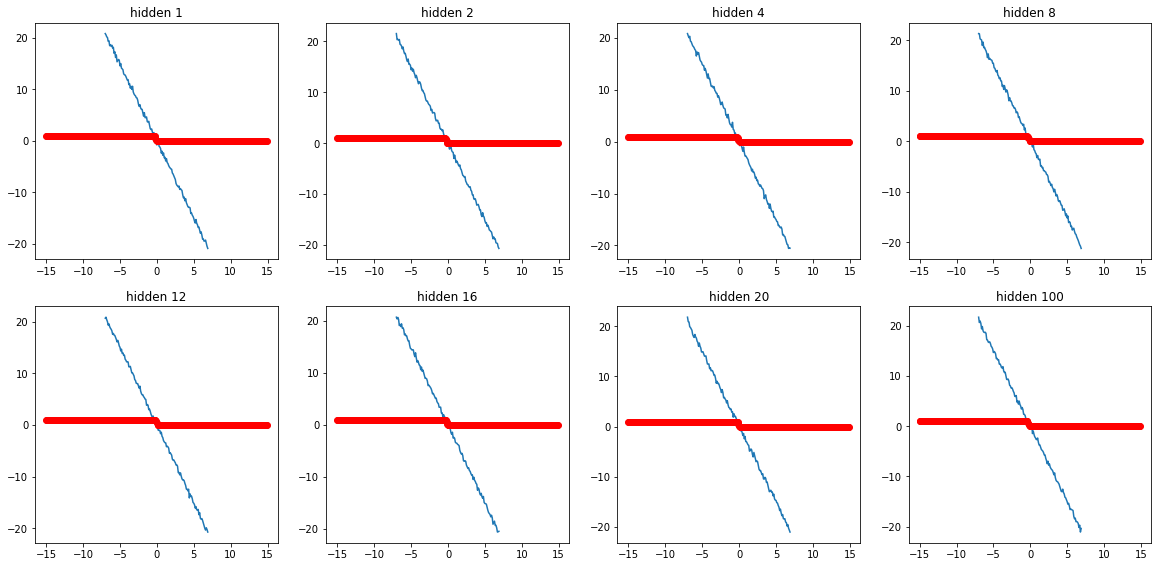

             activations: ['tanh', 'sigmoid']


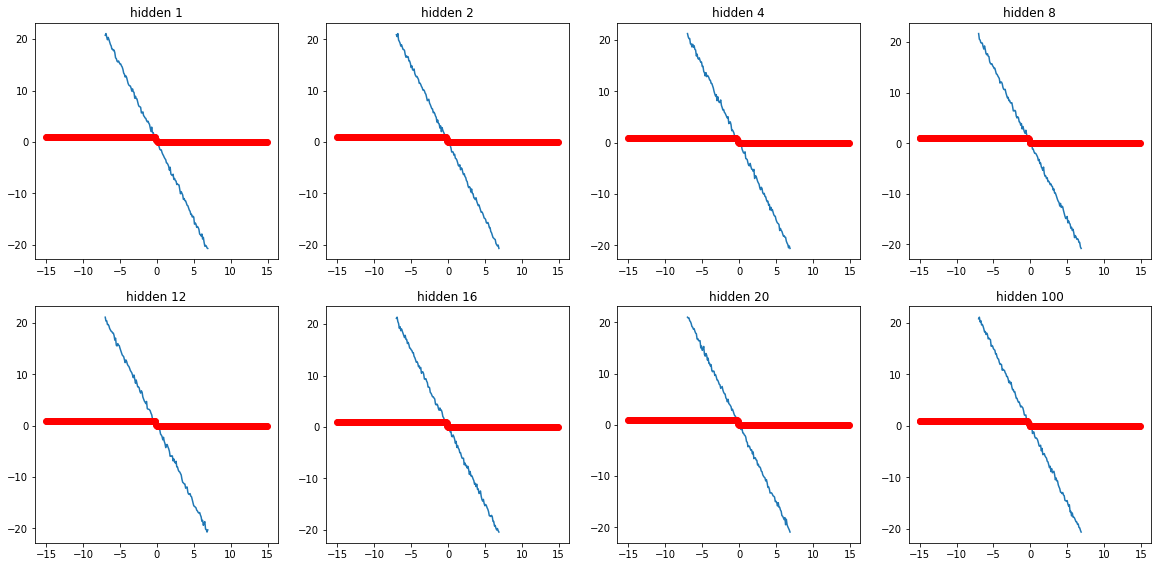

             activations: ['', 'tanh']


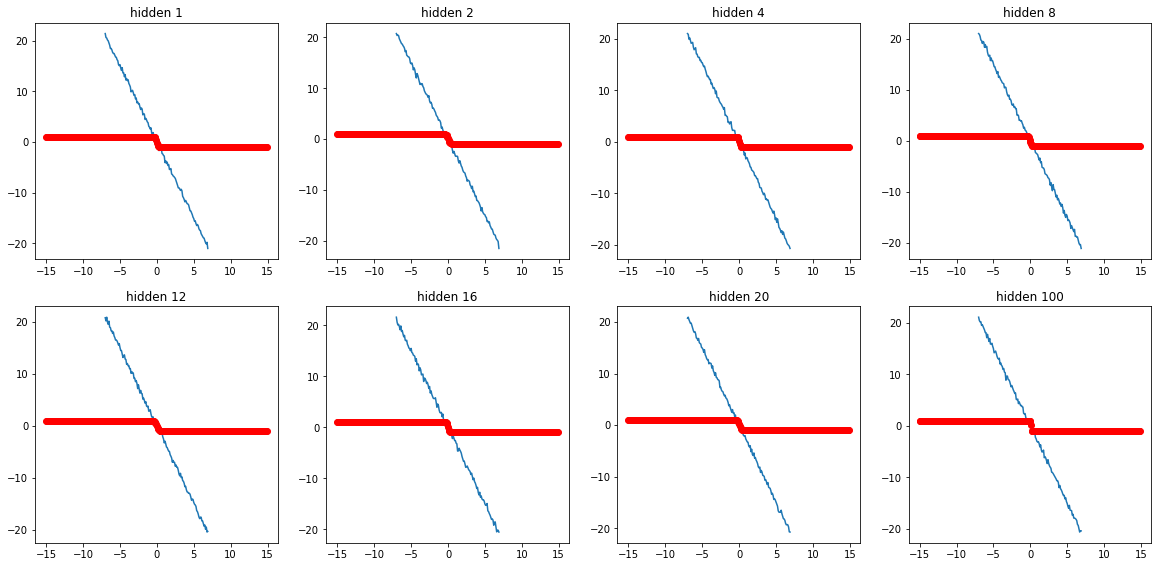

             activations: ['relu', 'tanh']


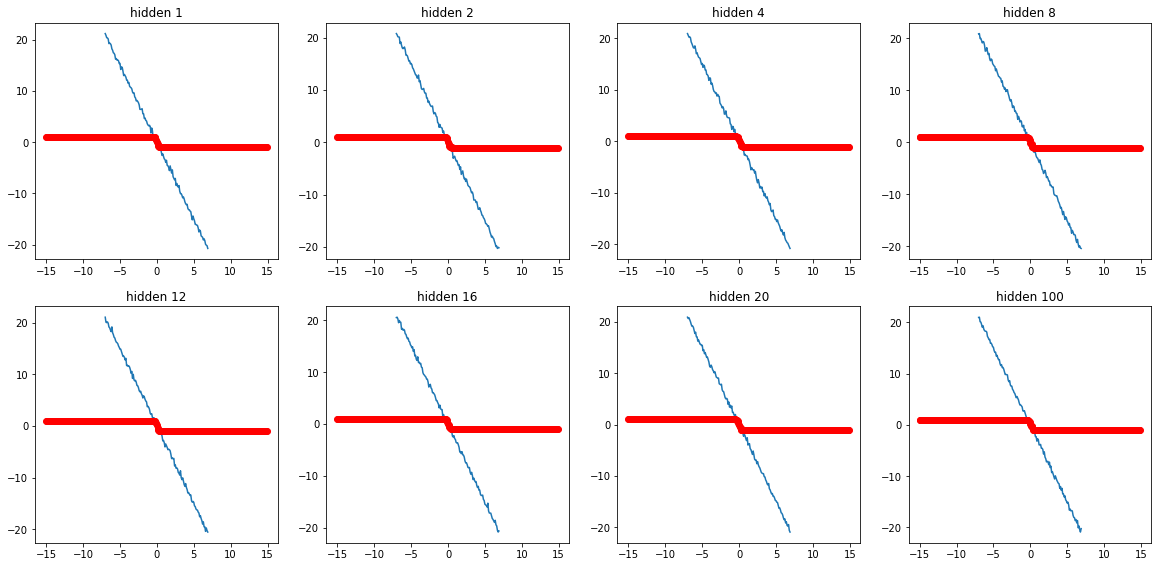

             activations: ['', '']


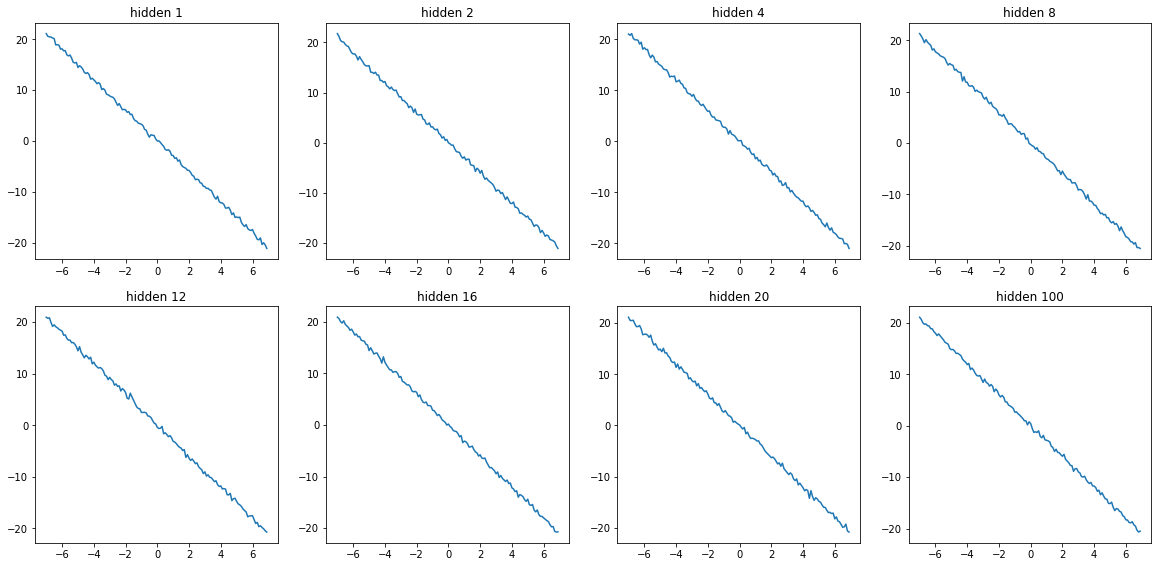

             activations: ['relu', '']


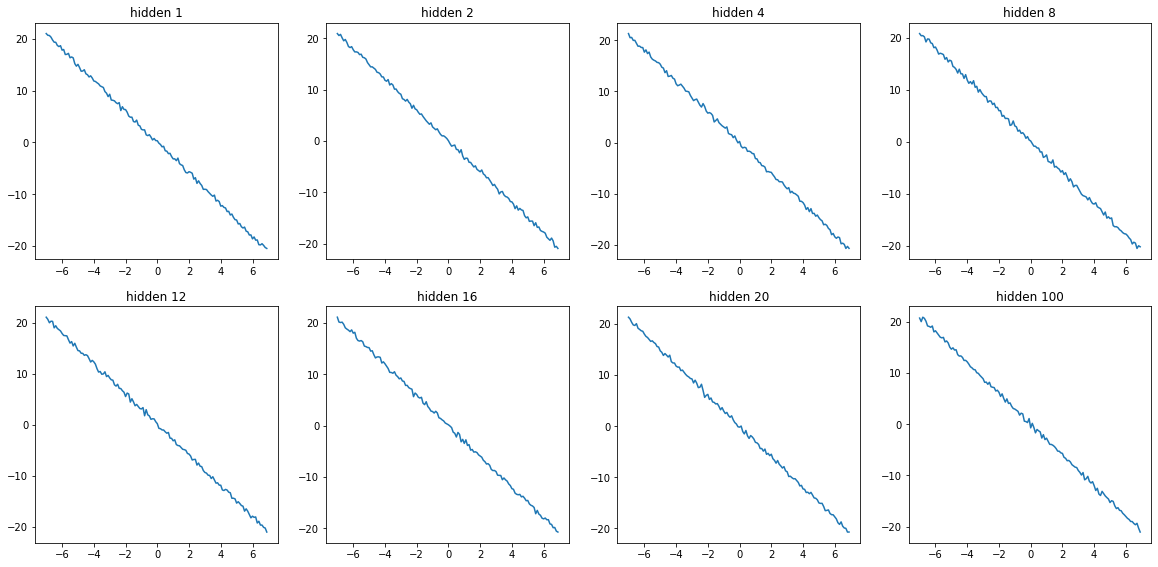

             activations: ['', 'relu']


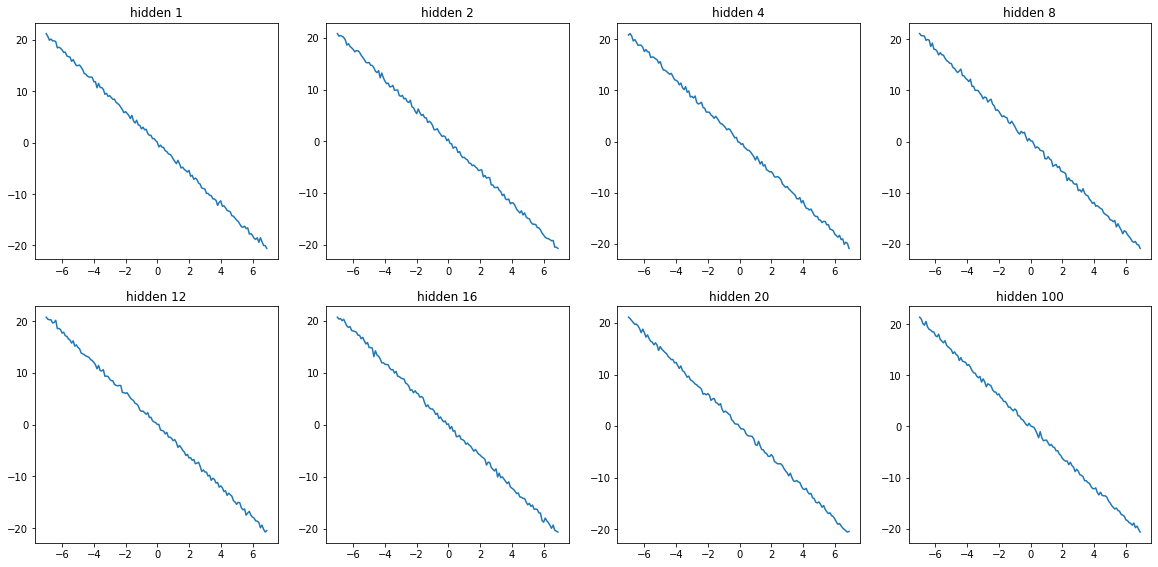

             activations: ['tanh', '']


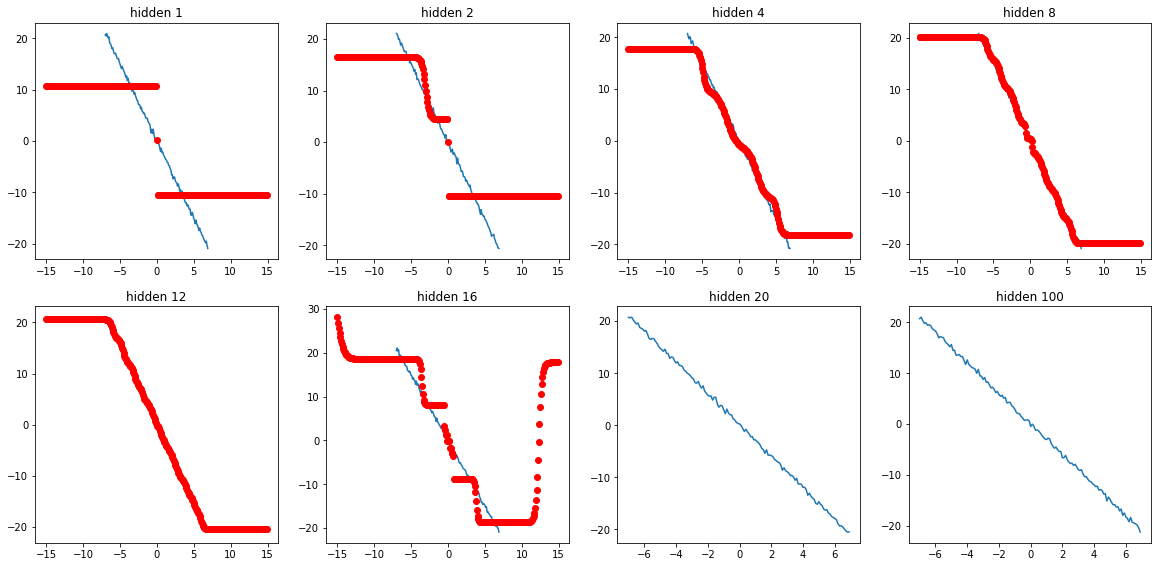

             activations: ['sigmoid', '']


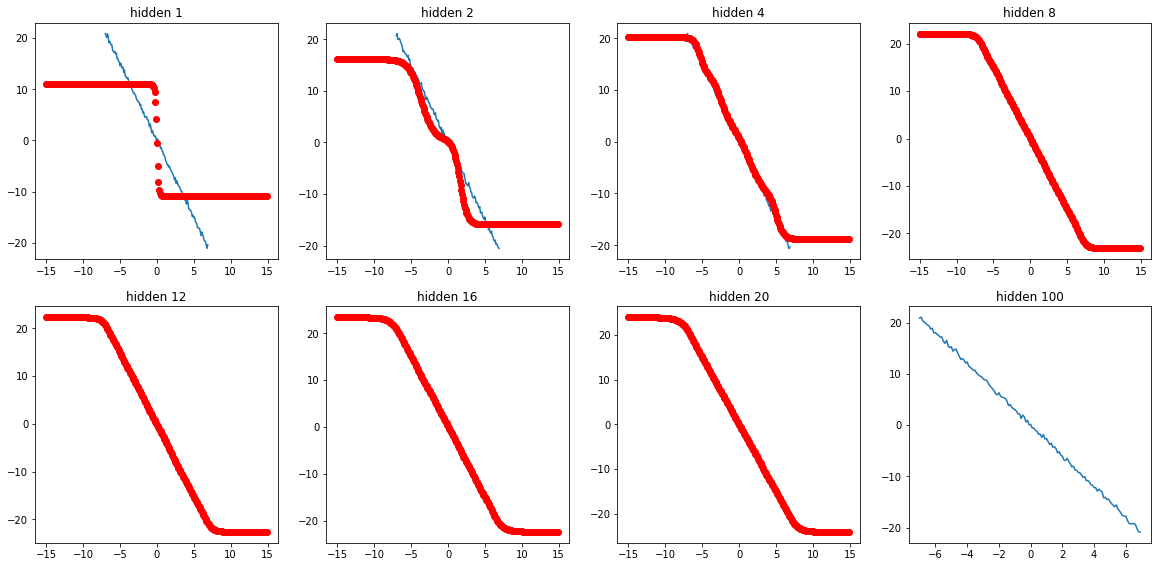

             activations: ['sigmoid', 'relu']


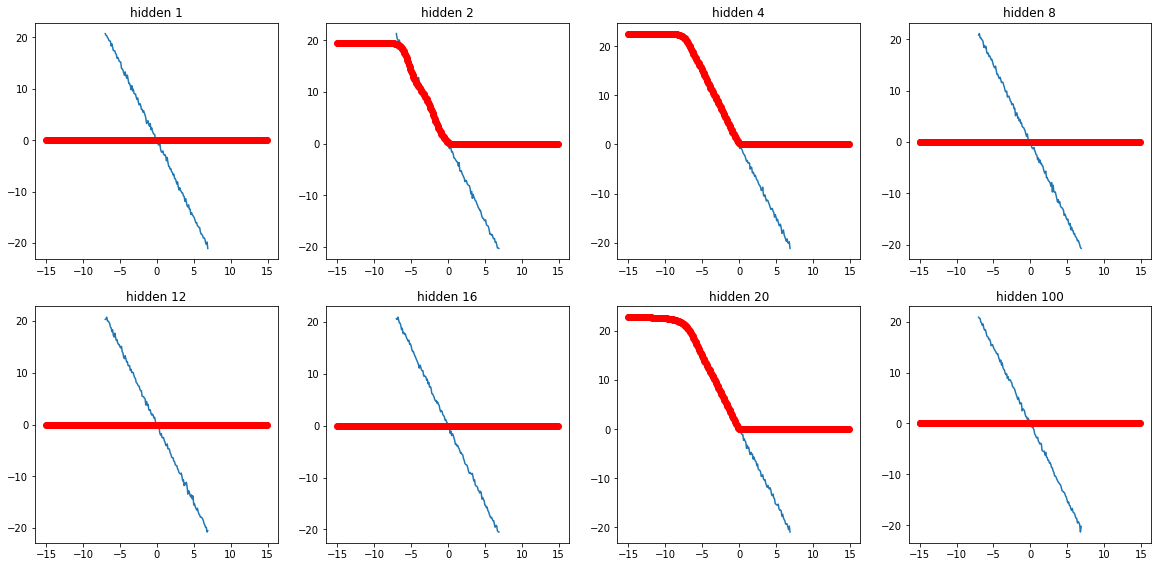

             activations: ['relu', 'sigmoid']


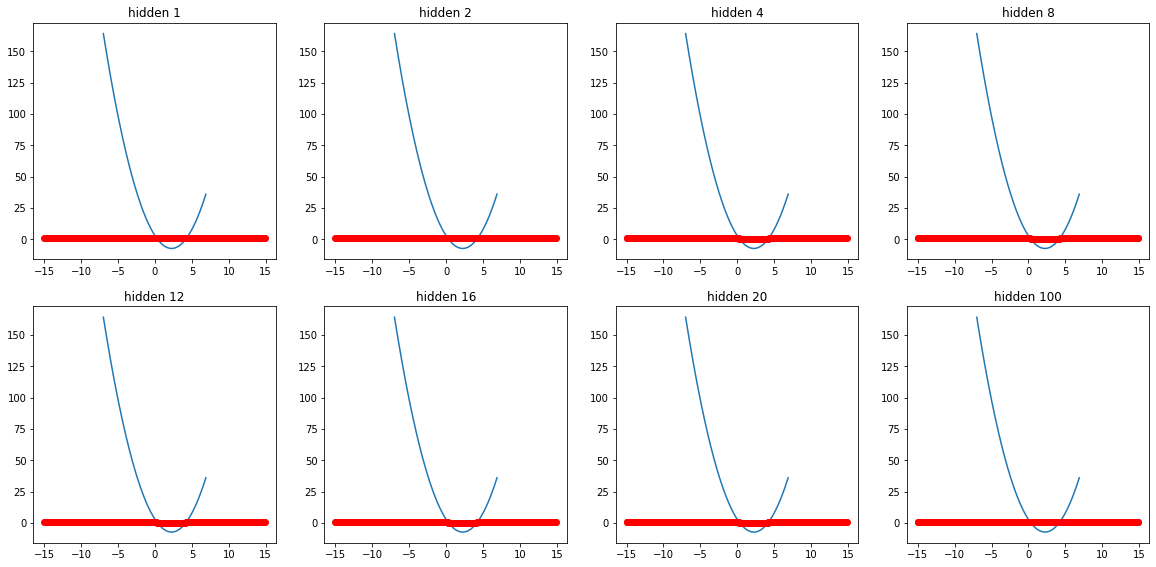

             activations: ['tanh', 'sigmoid']


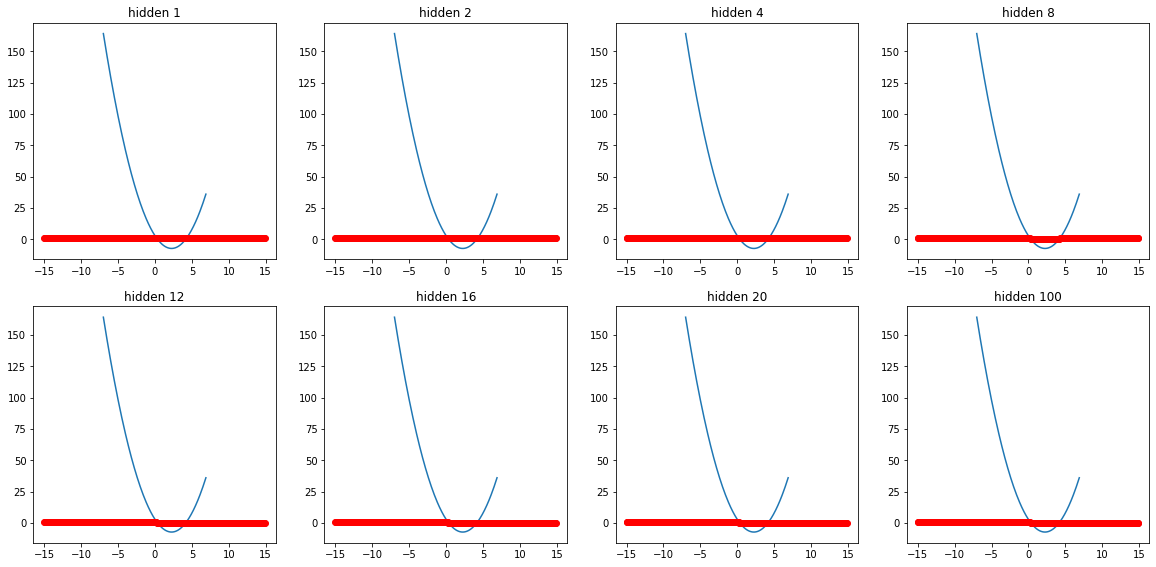

             activations: ['', 'tanh']


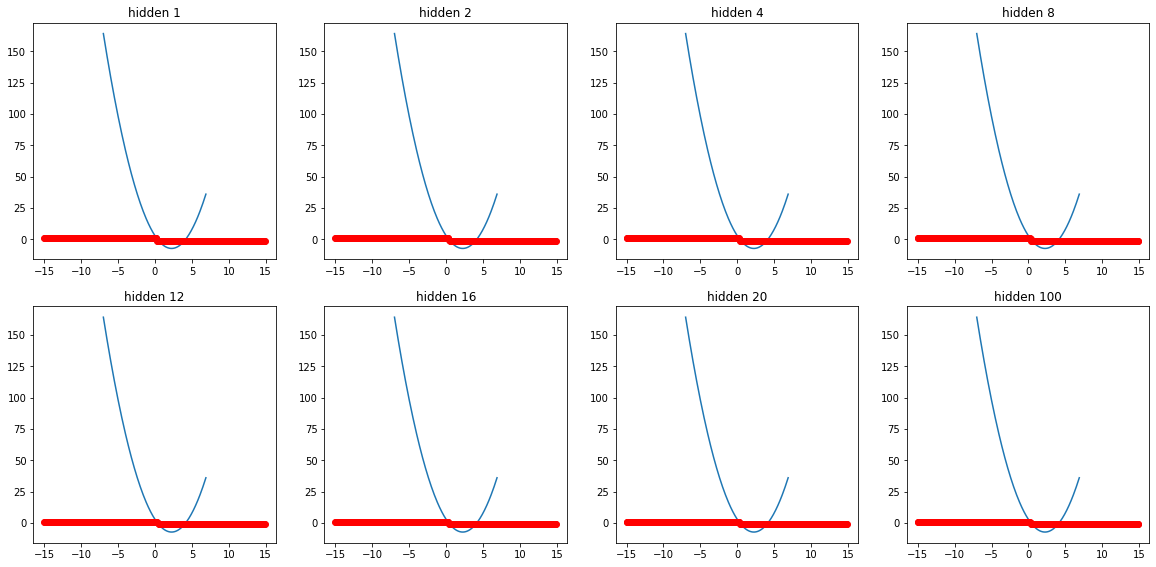

             activations: ['relu', 'tanh']


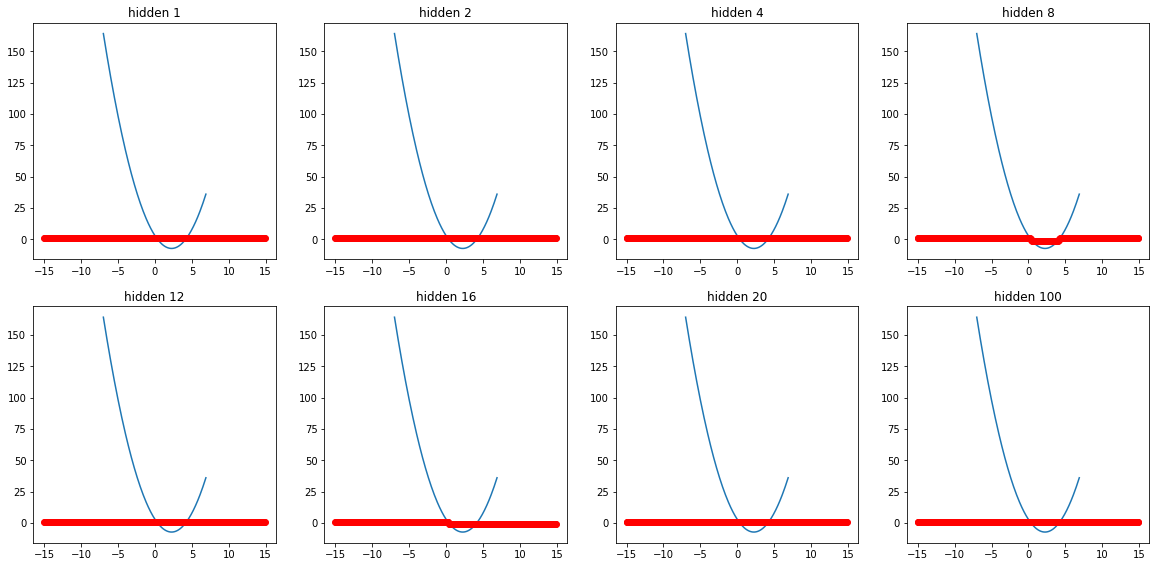

             activations: ['', '']


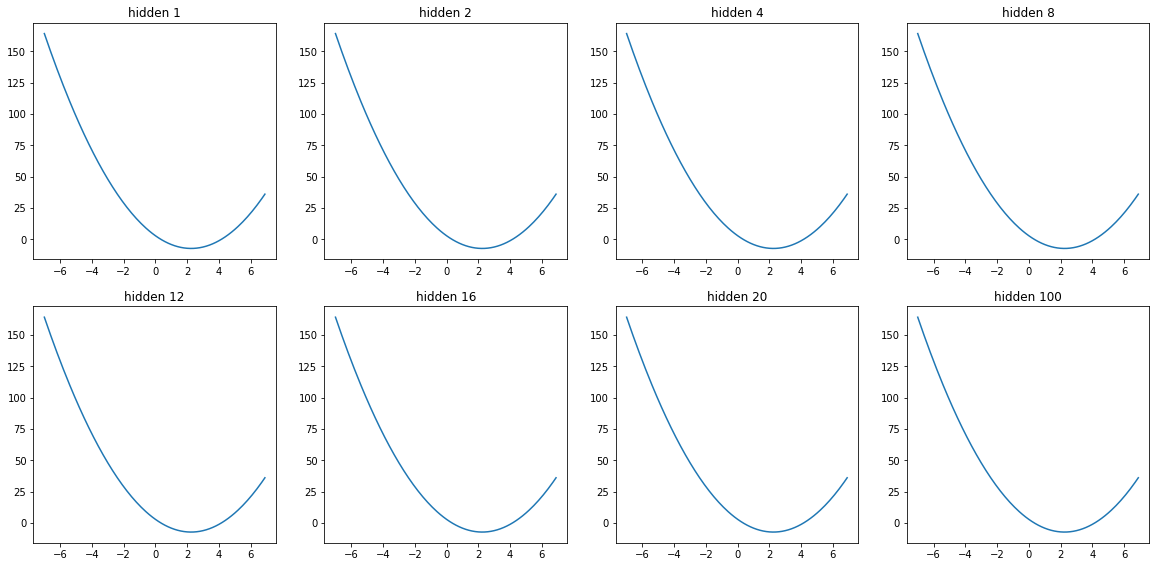

             activations: ['relu', '']


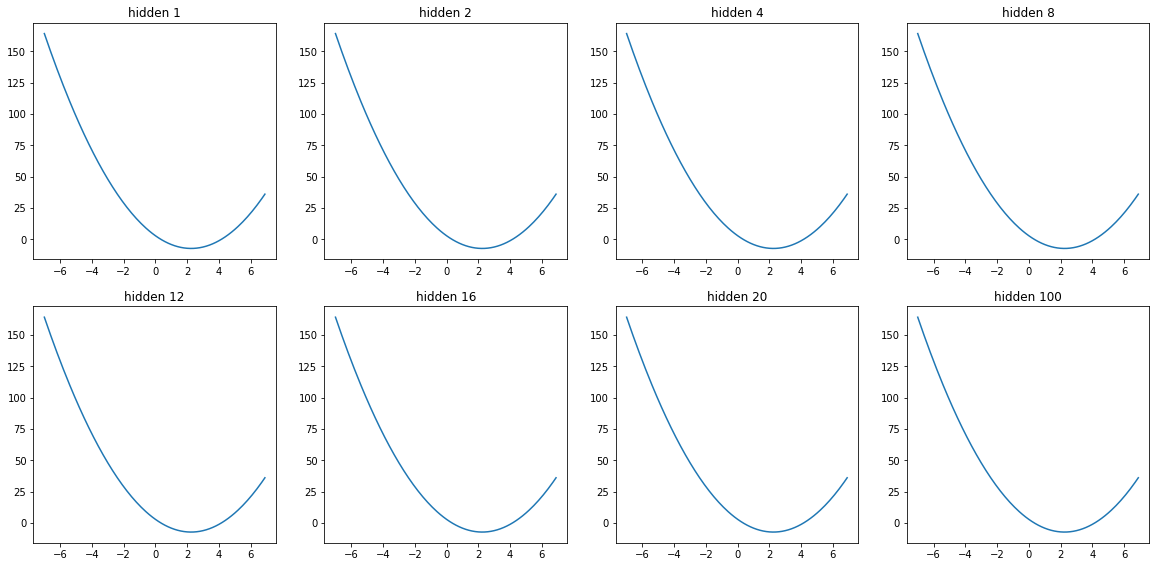

             activations: ['', 'relu']


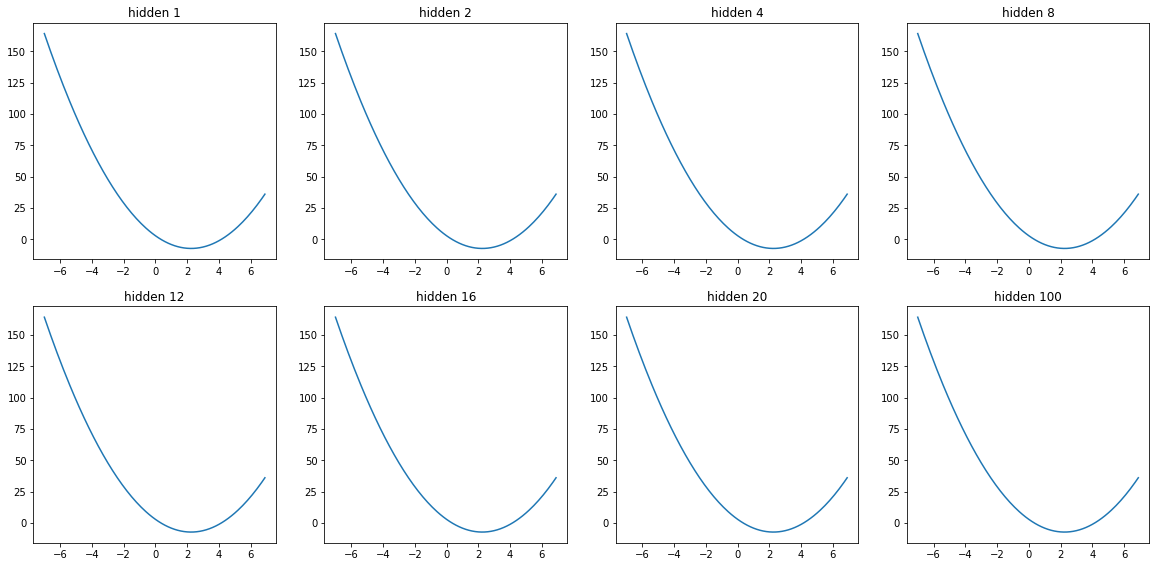

             activations: ['tanh', '']


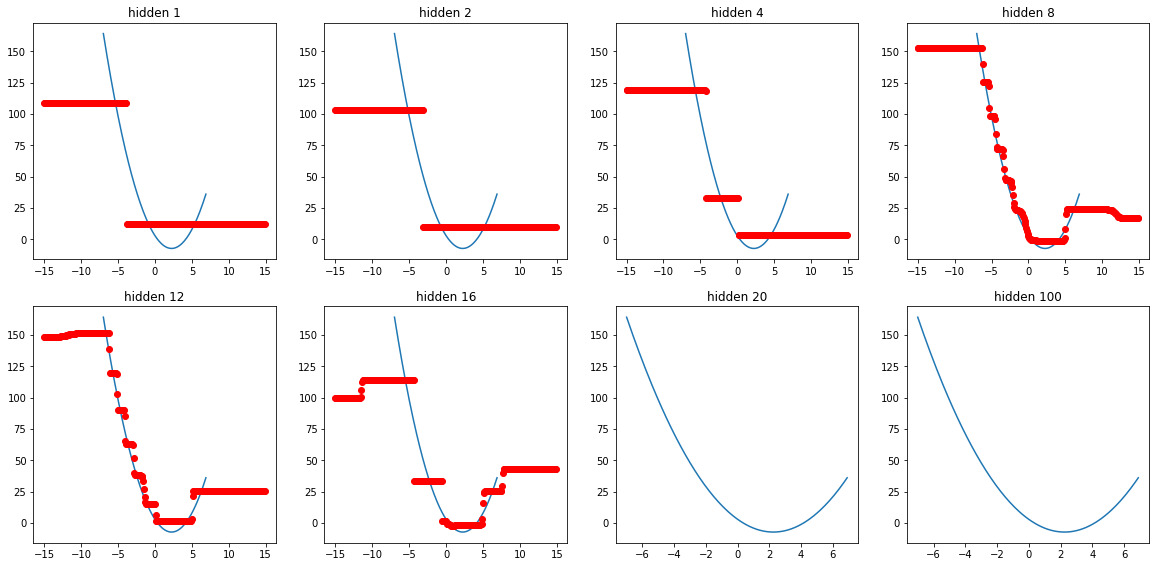

             activations: ['sigmoid', '']


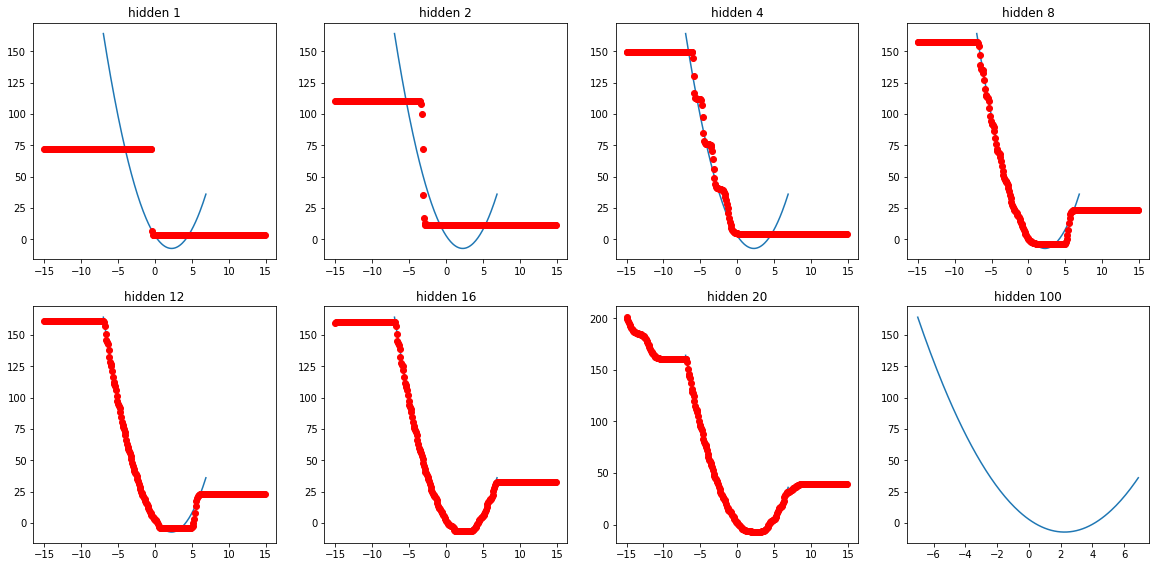

             activations: ['sigmoid', 'relu']


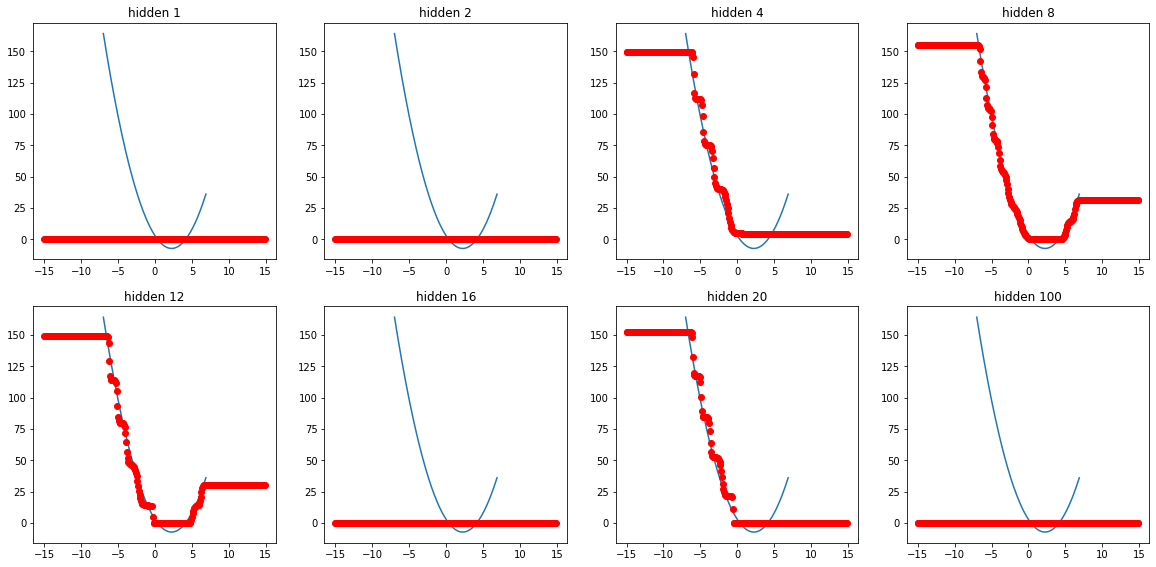

             activations: ['relu', 'sigmoid']


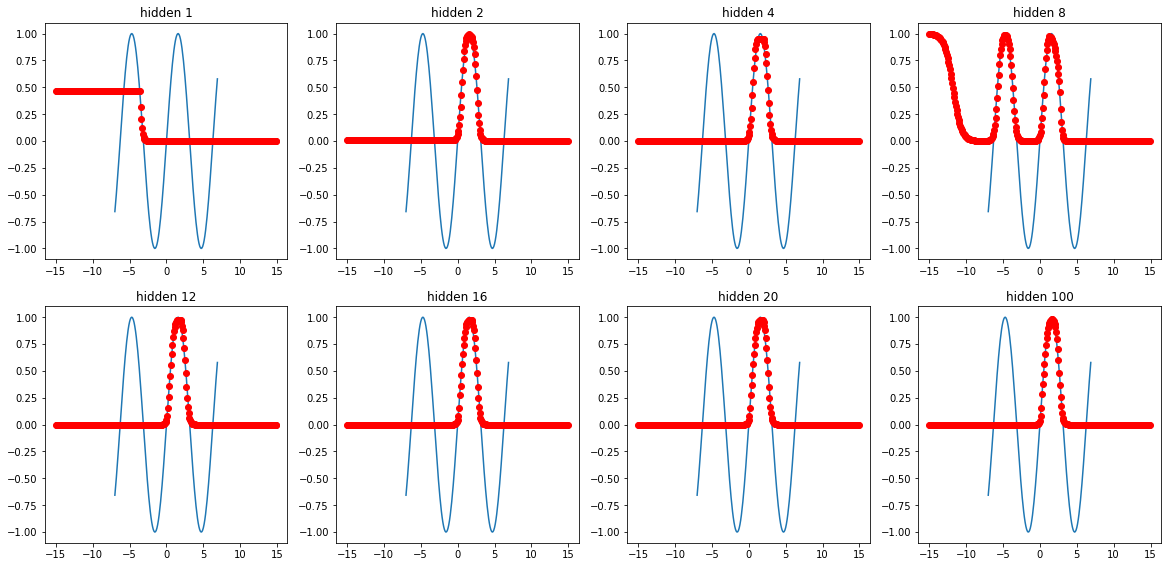

             activations: ['tanh', 'sigmoid']


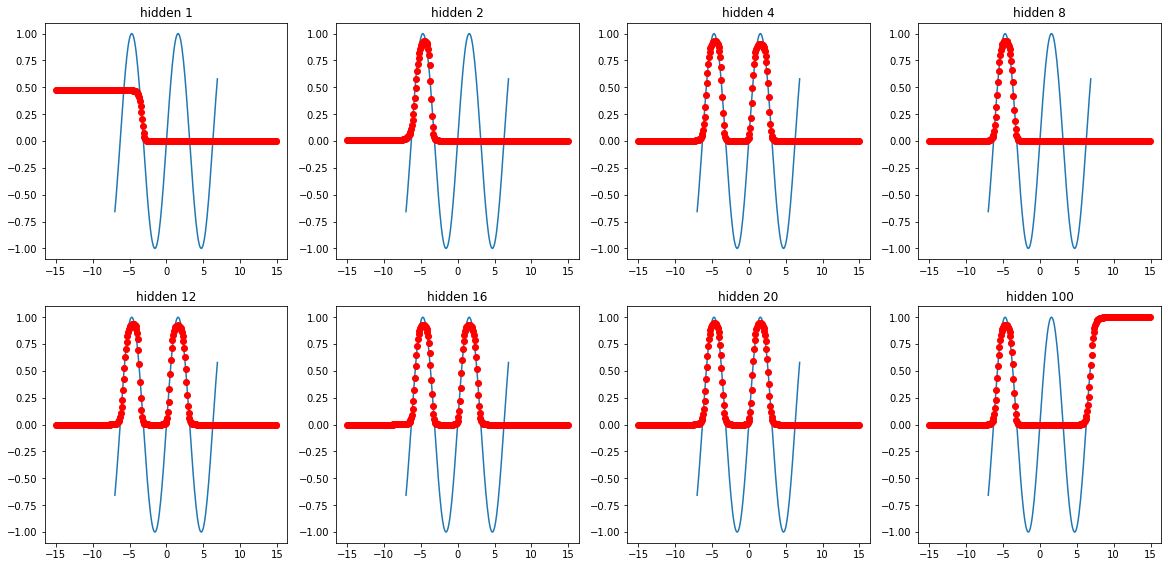

             activations: ['', 'tanh']


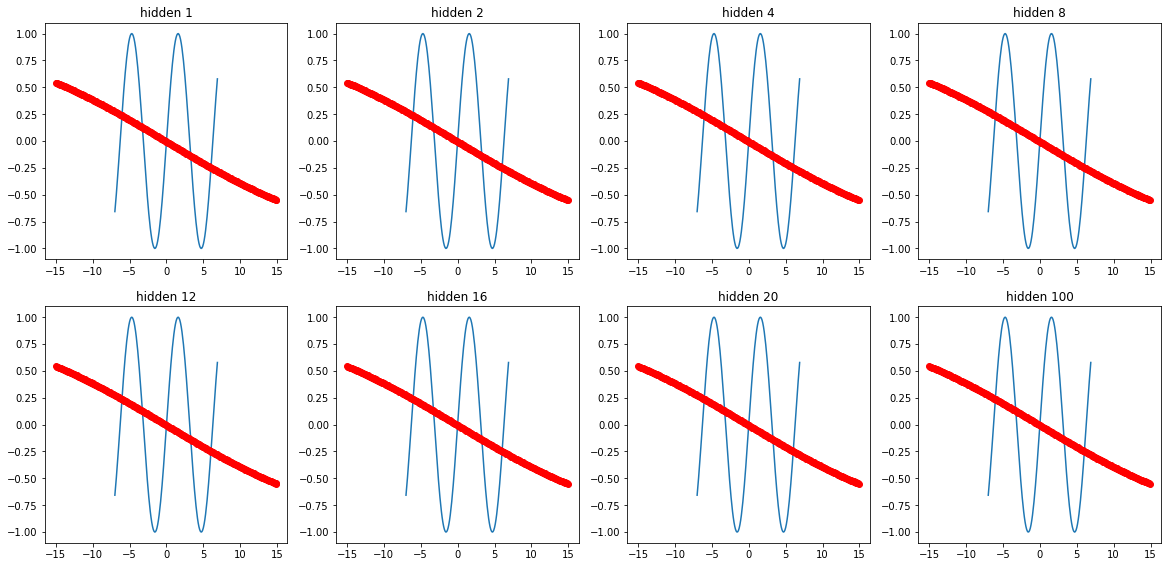

             activations: ['relu', 'tanh']


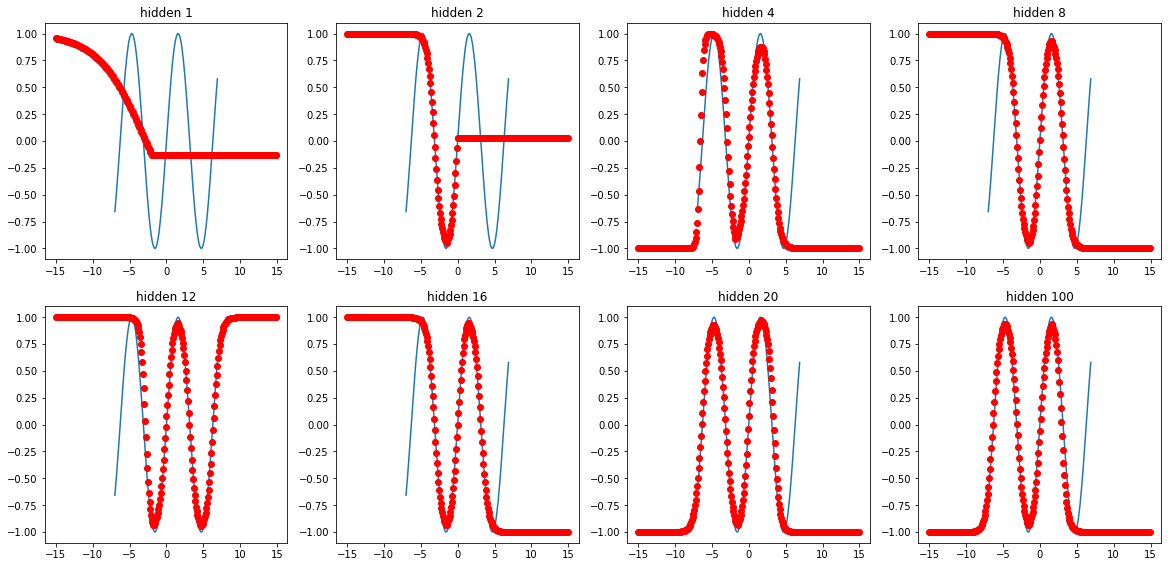

             activations: ['', '']


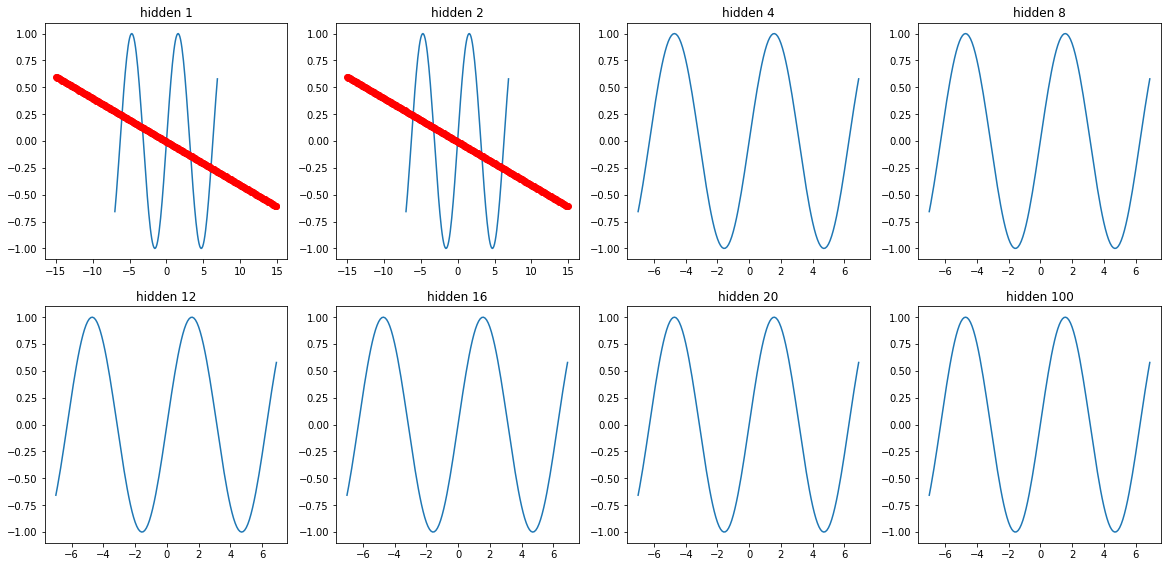

             activations: ['relu', '']


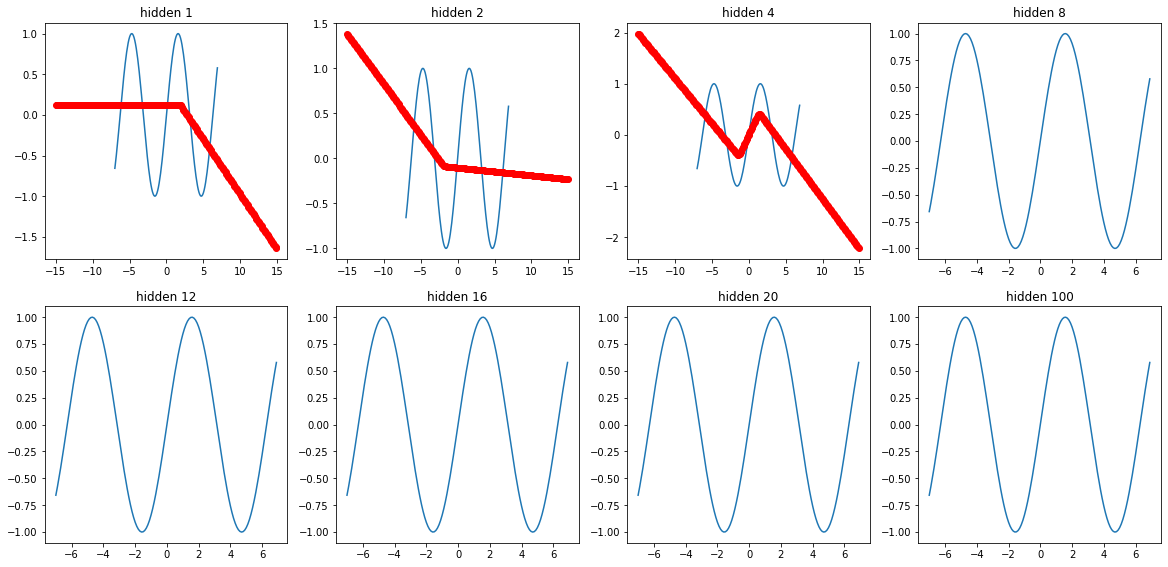

             activations: ['', 'relu']


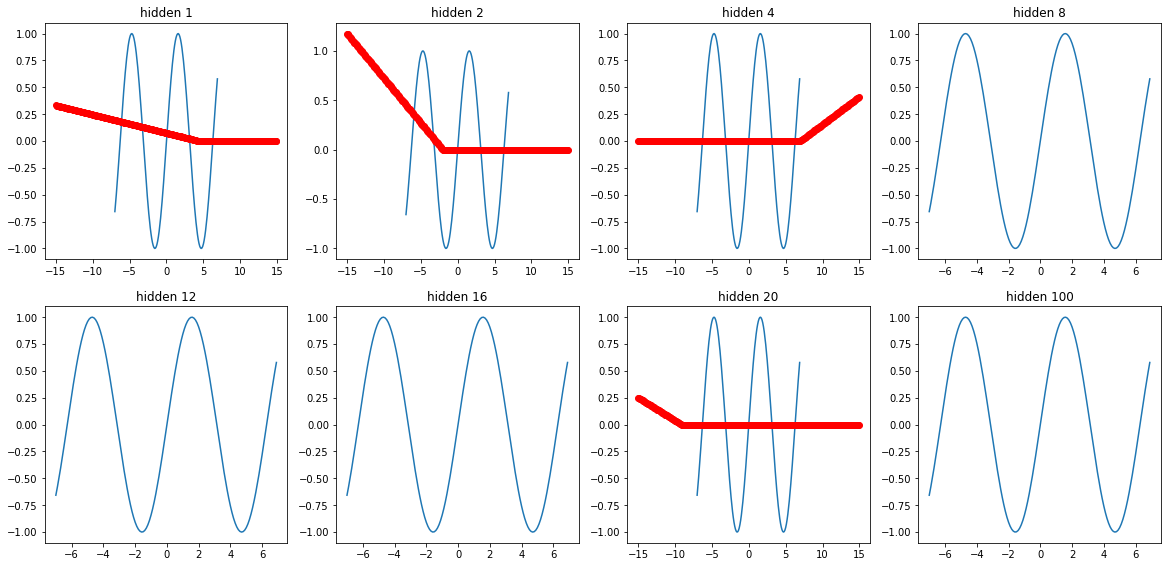

             activations: ['tanh', '']


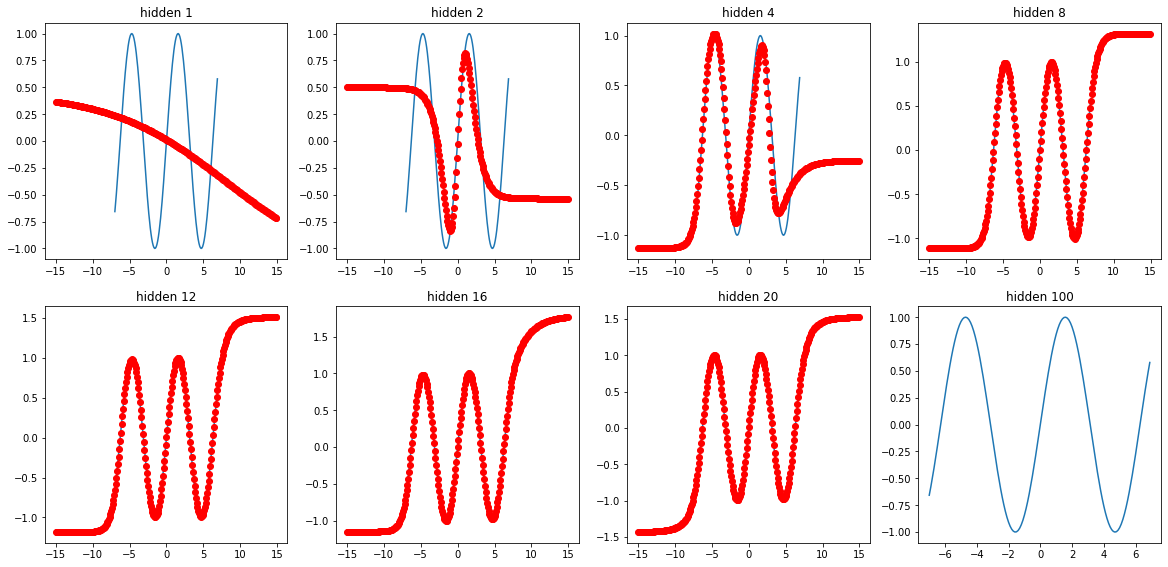

             activations: ['sigmoid', '']


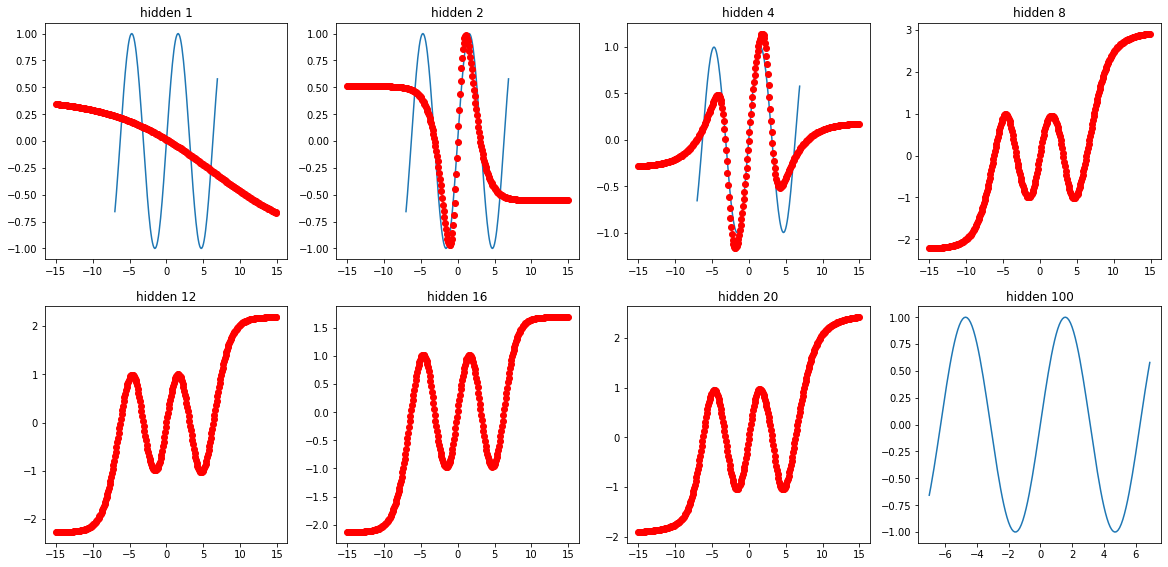

             activations: ['sigmoid', 'relu']


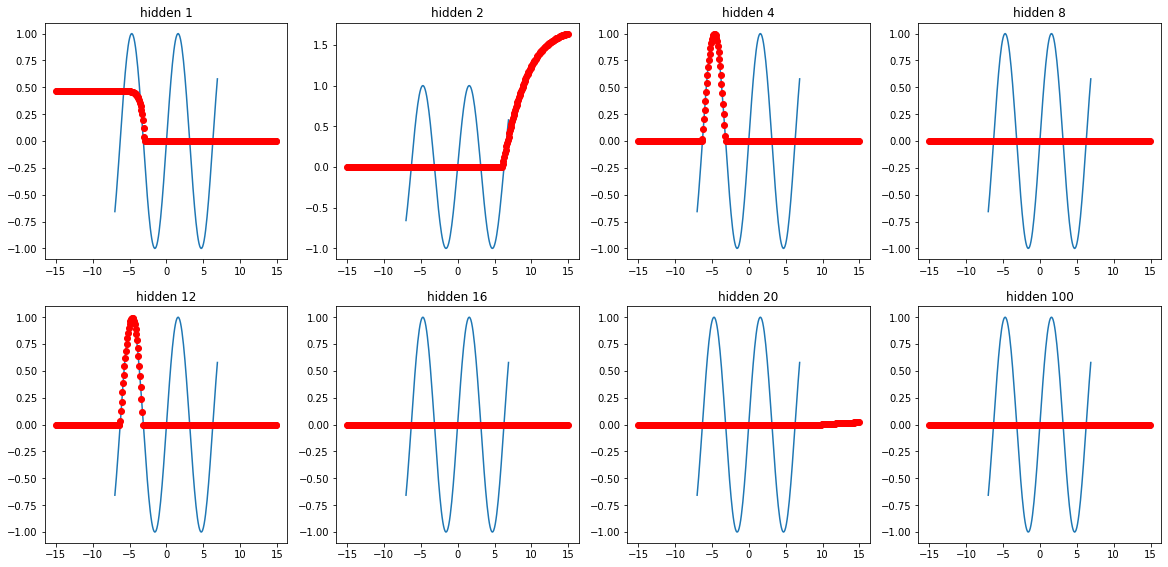

             activations: ['relu', 'sigmoid']


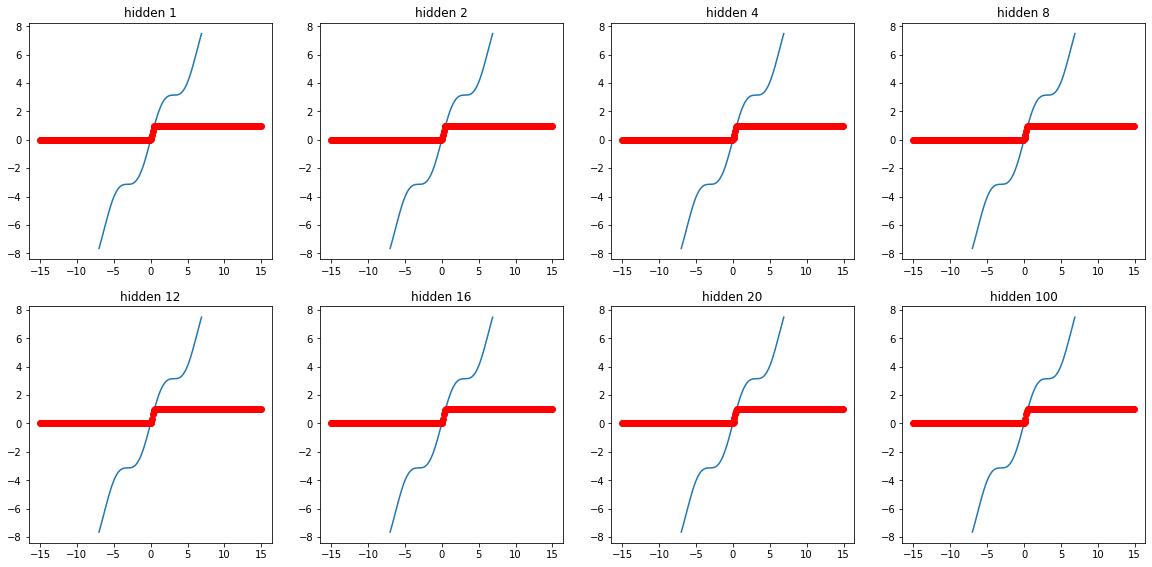

             activations: ['tanh', 'sigmoid']


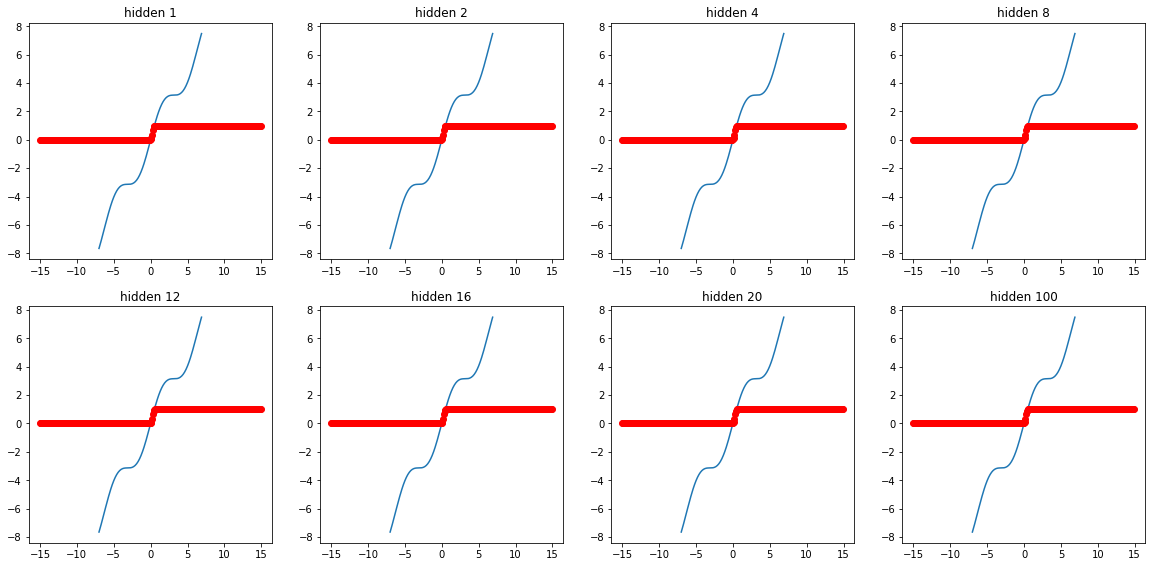

             activations: ['', 'tanh']


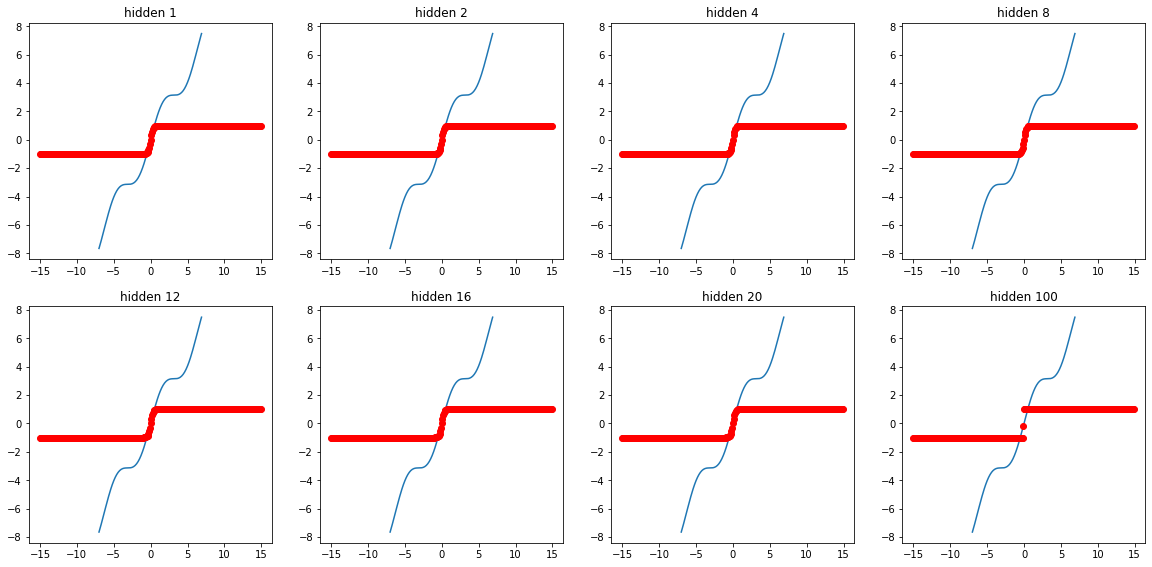

             activations: ['relu', 'tanh']


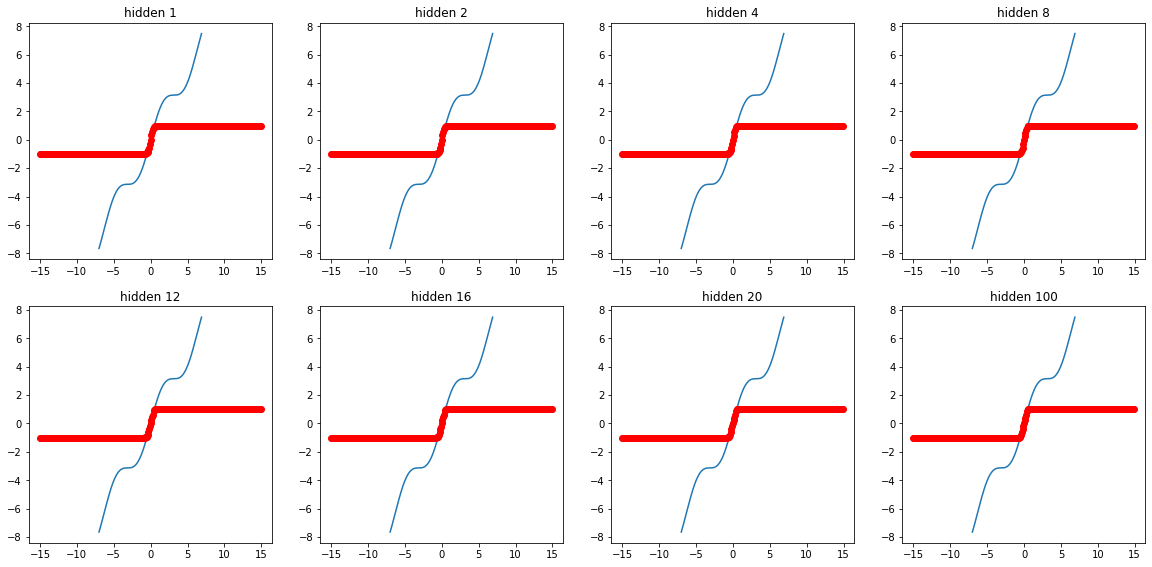

             activations: ['', '']


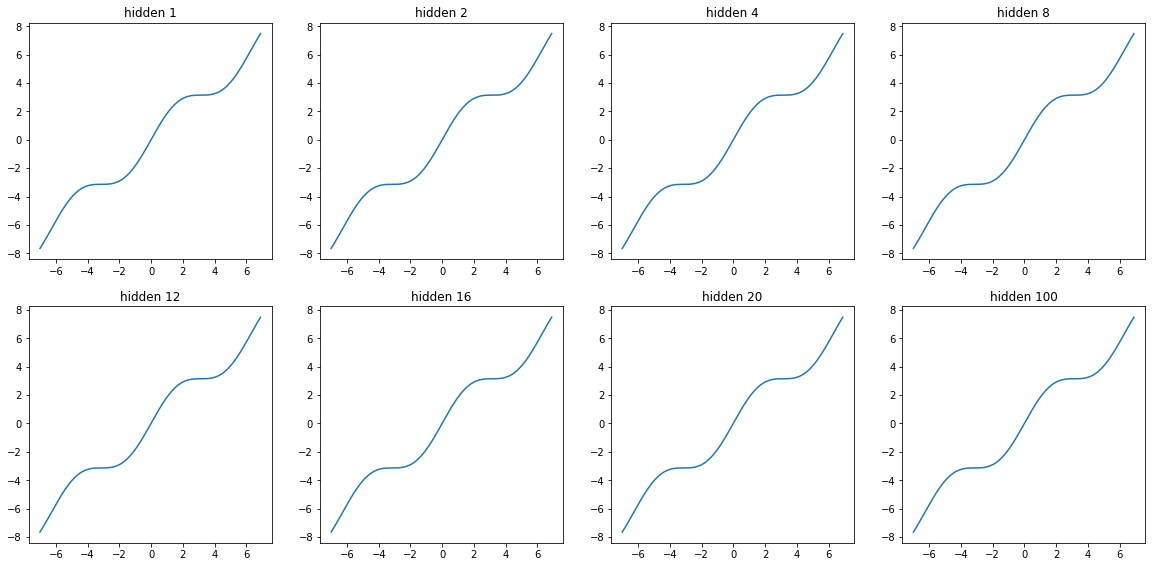

             activations: ['relu', '']


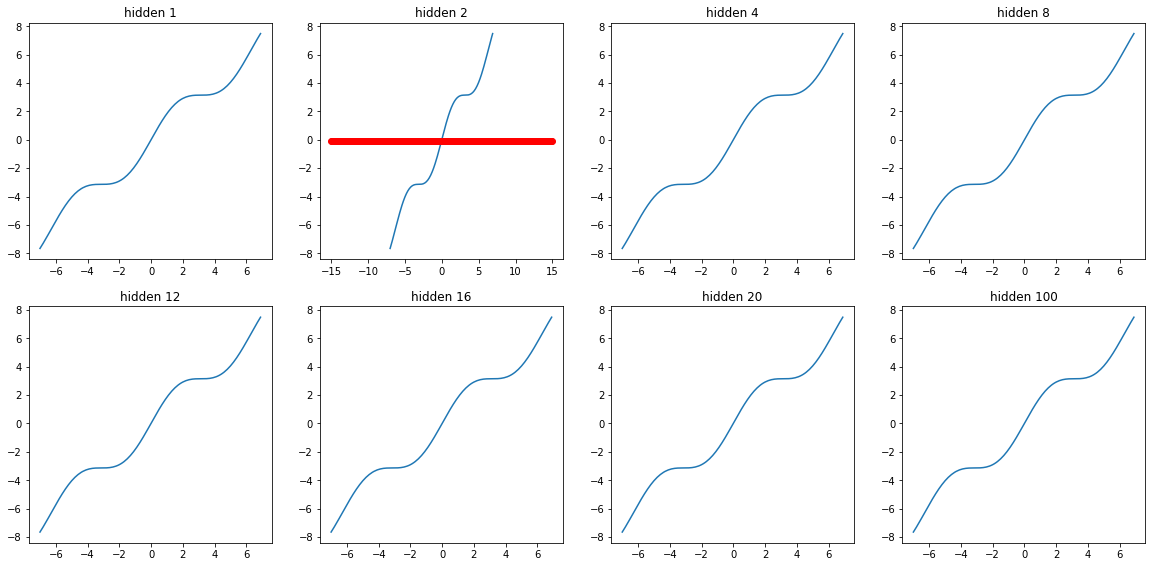

             activations: ['', 'relu']


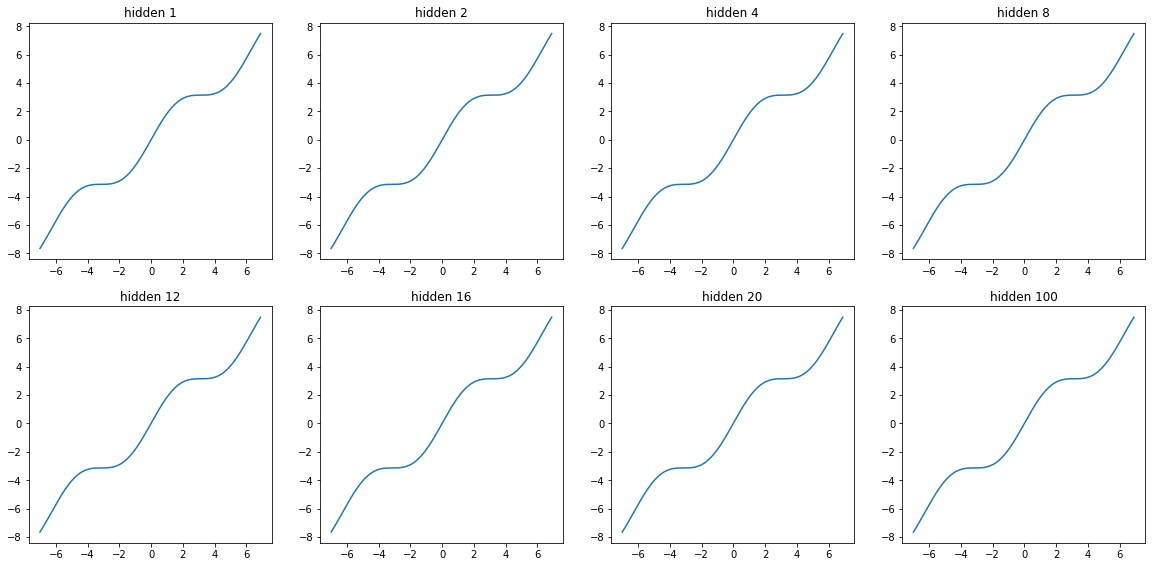

             activations: ['tanh', '']


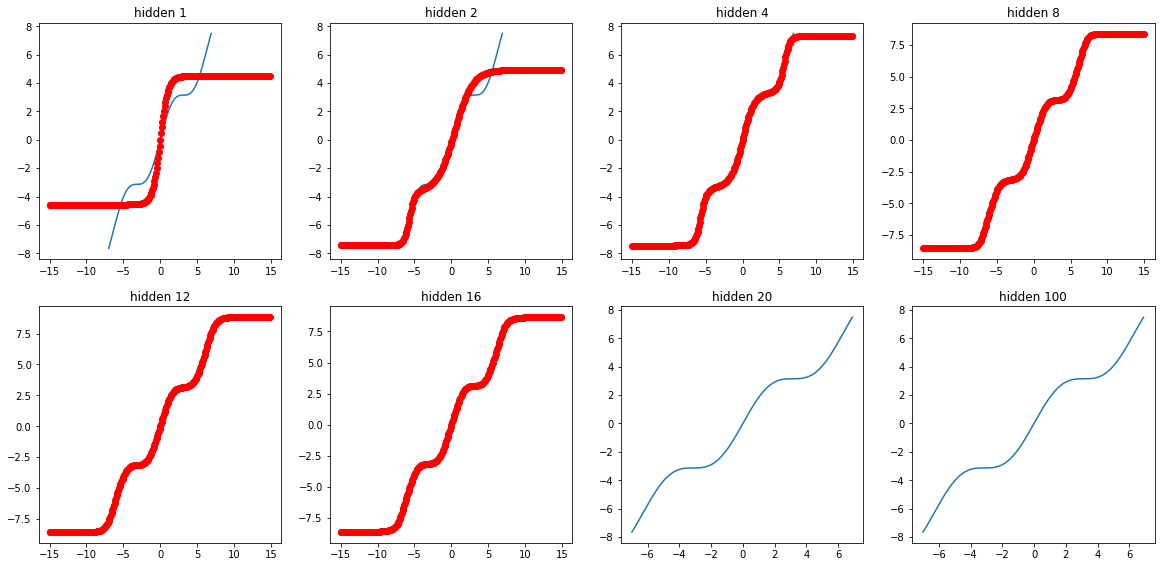

             activations: ['sigmoid', '']


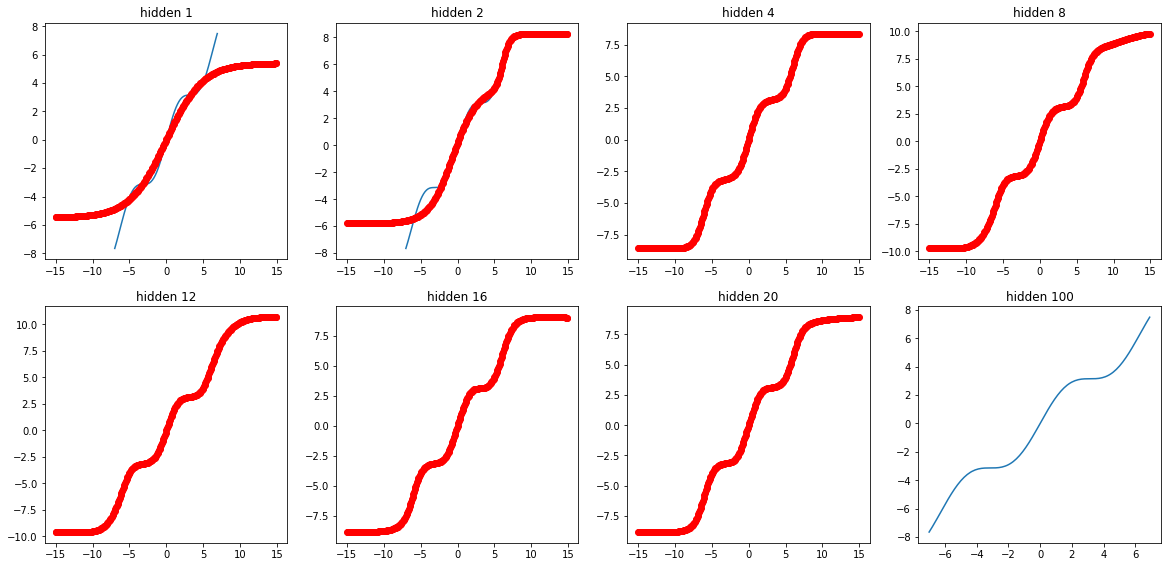

             activations: ['sigmoid', 'relu']


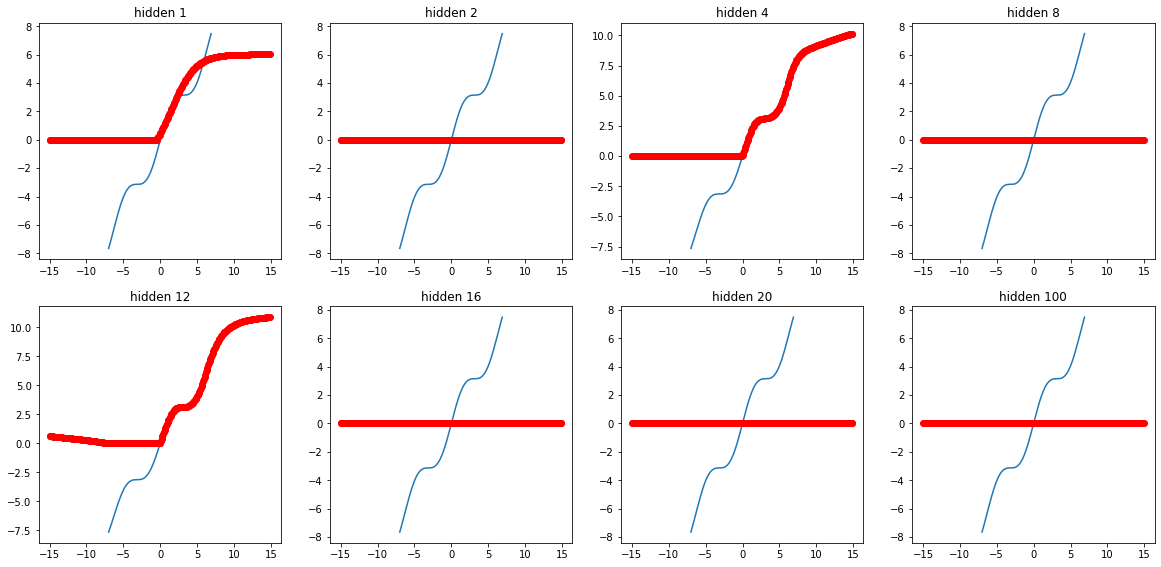

             activations: ['relu', 'sigmoid']


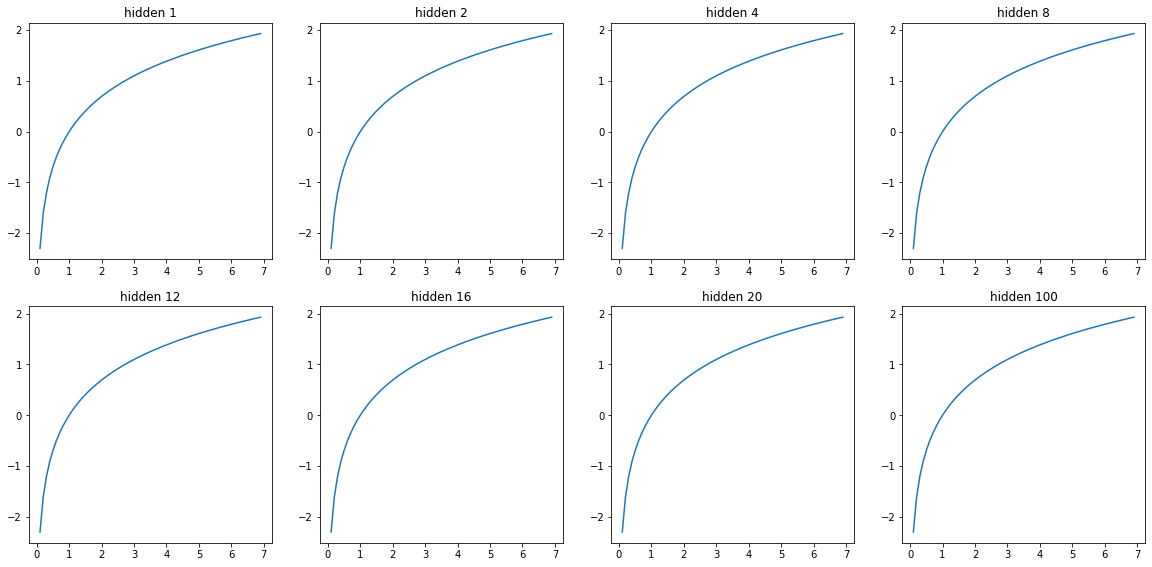

             activations: ['tanh', 'sigmoid']


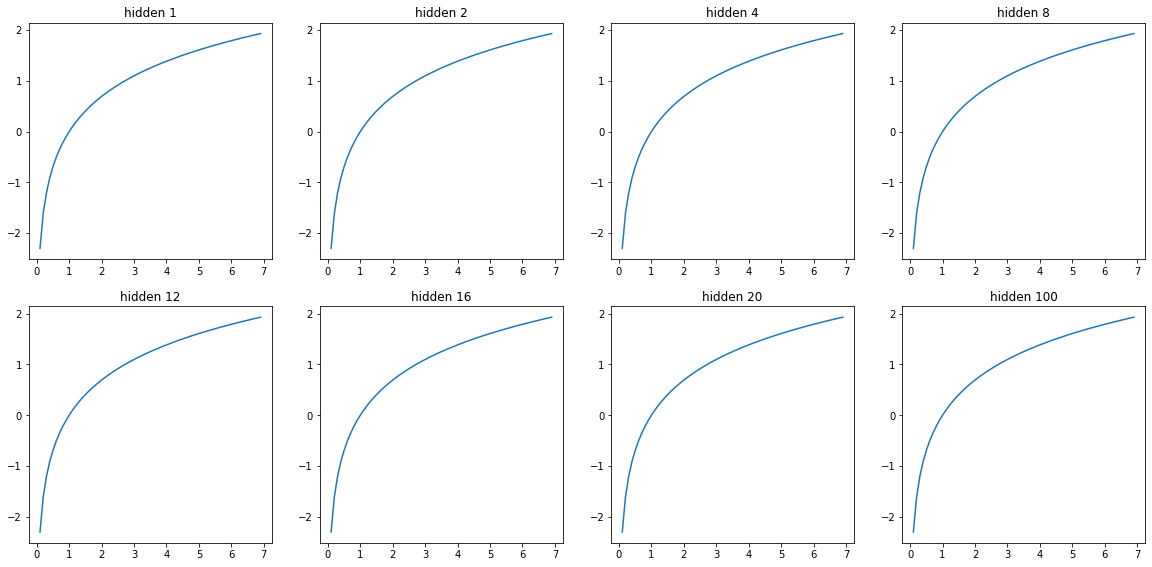

             activations: ['', 'tanh']


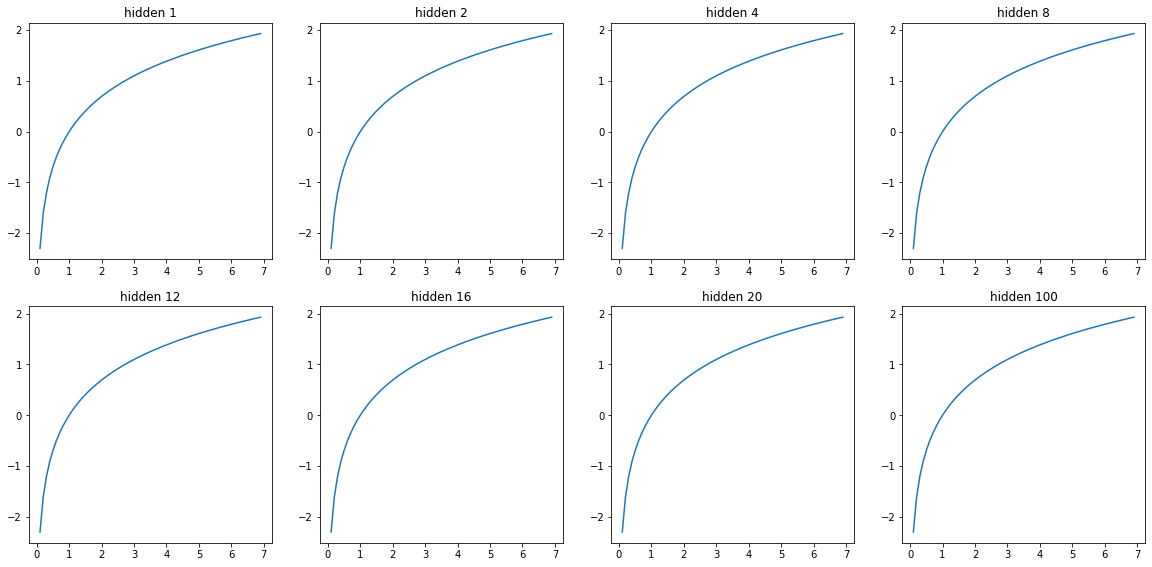

             activations: ['relu', 'tanh']


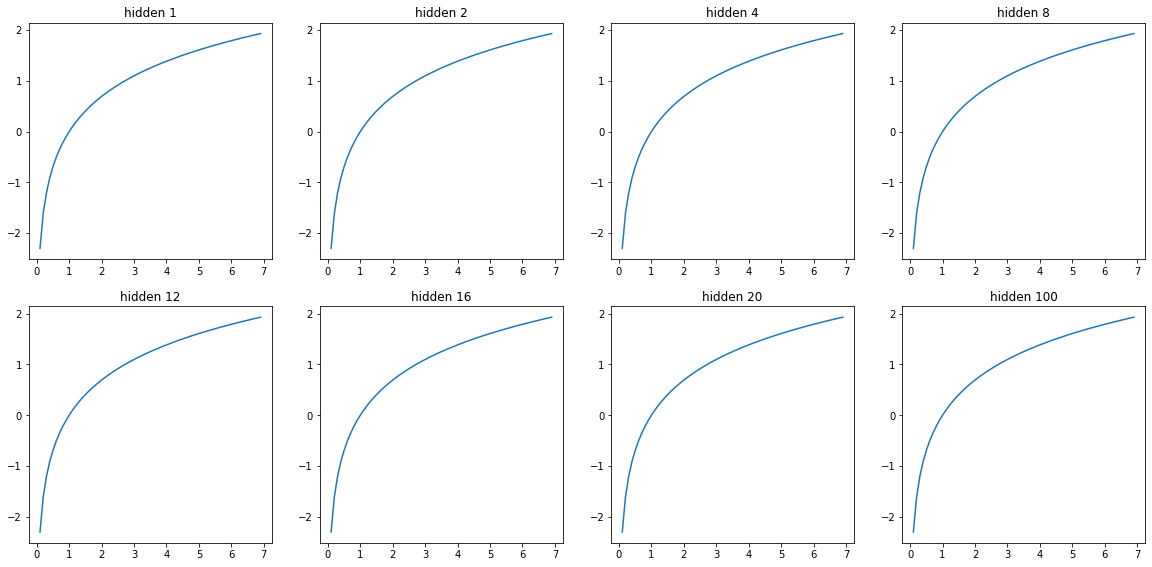

             activations: ['', '']


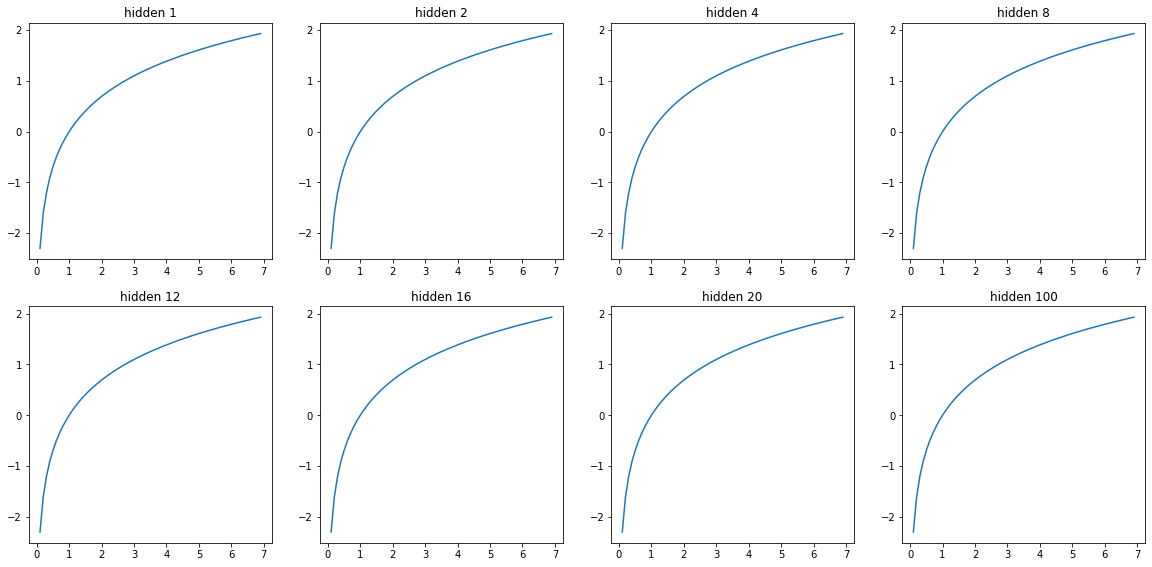

             activations: ['relu', '']


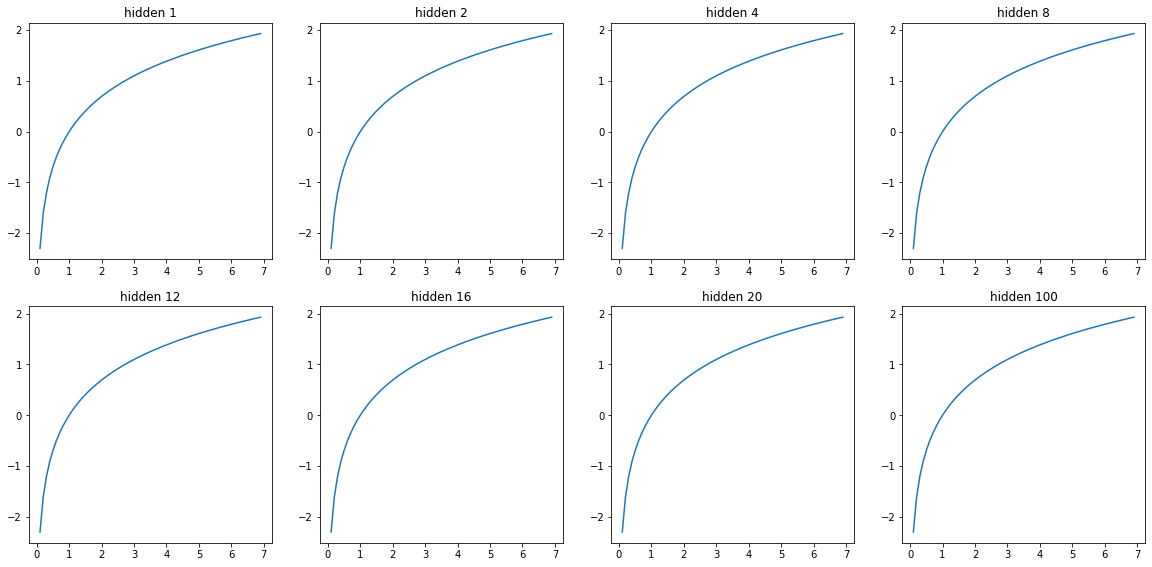

             activations: ['', 'relu']


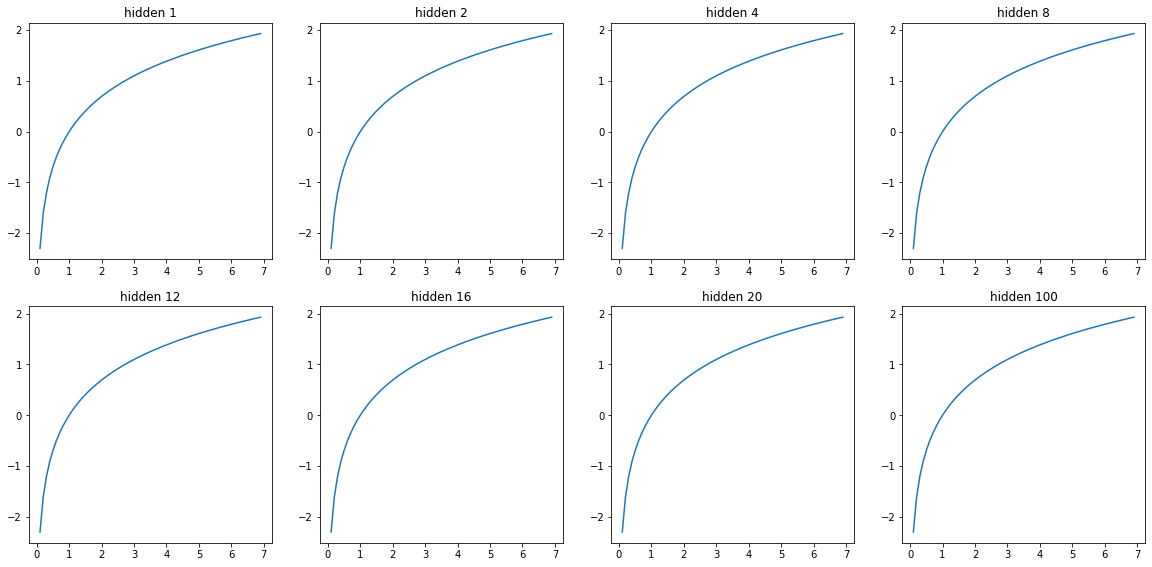

             activations: ['tanh', '']


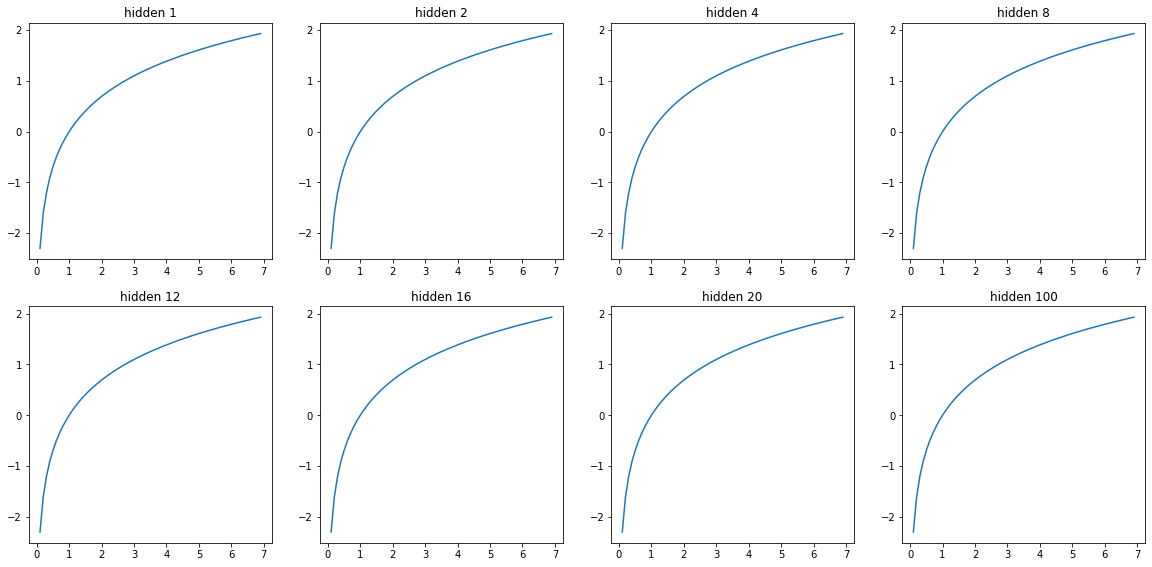

             activations: ['sigmoid', '']


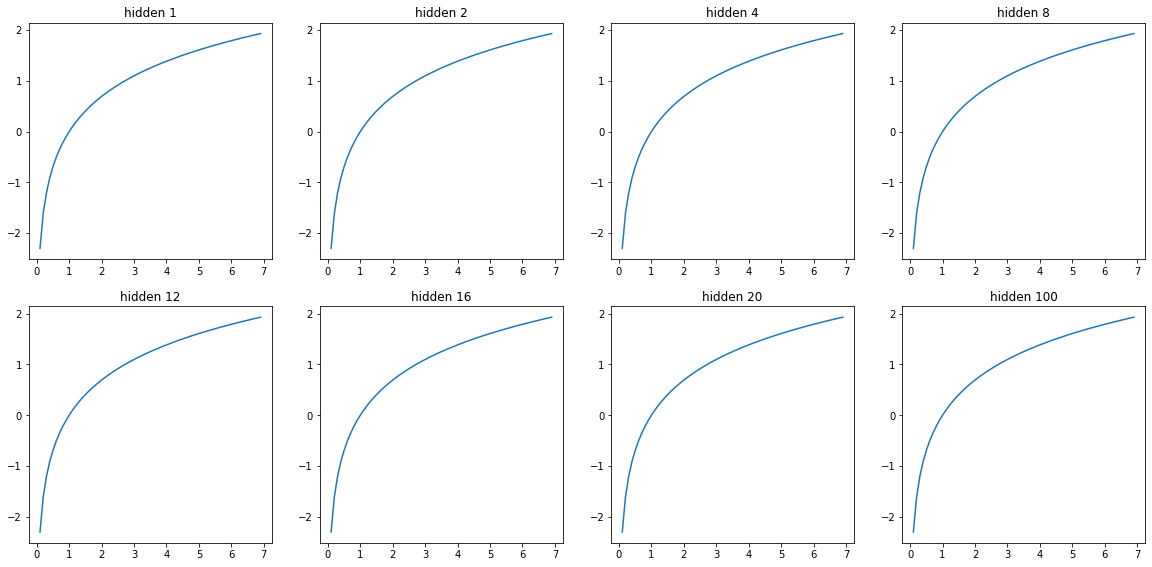

             activations: ['sigmoid', 'relu']


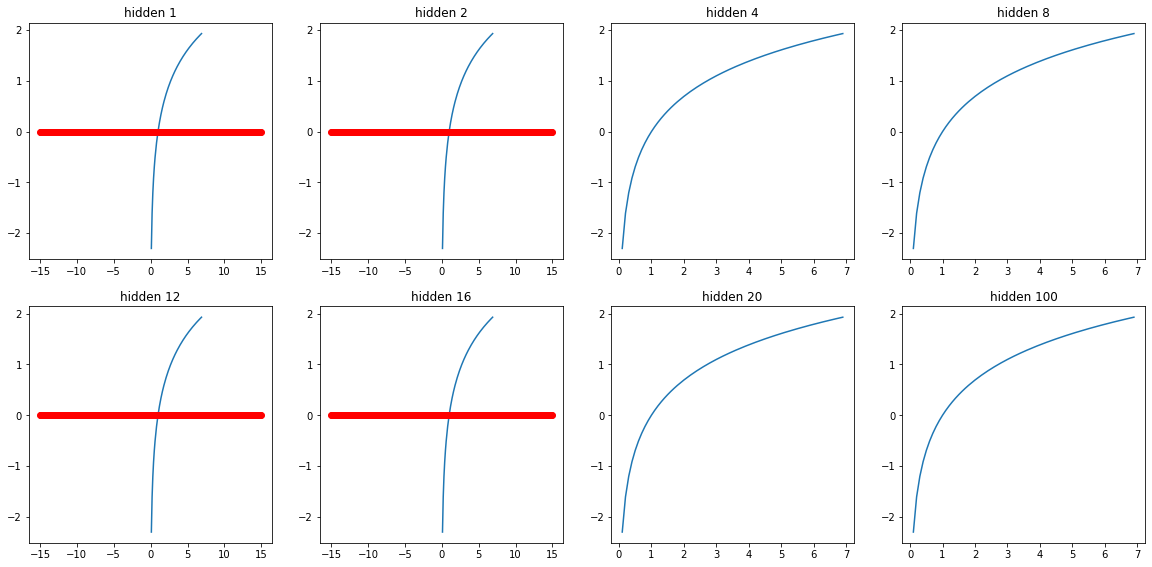

             activations: ['relu', 'sigmoid']


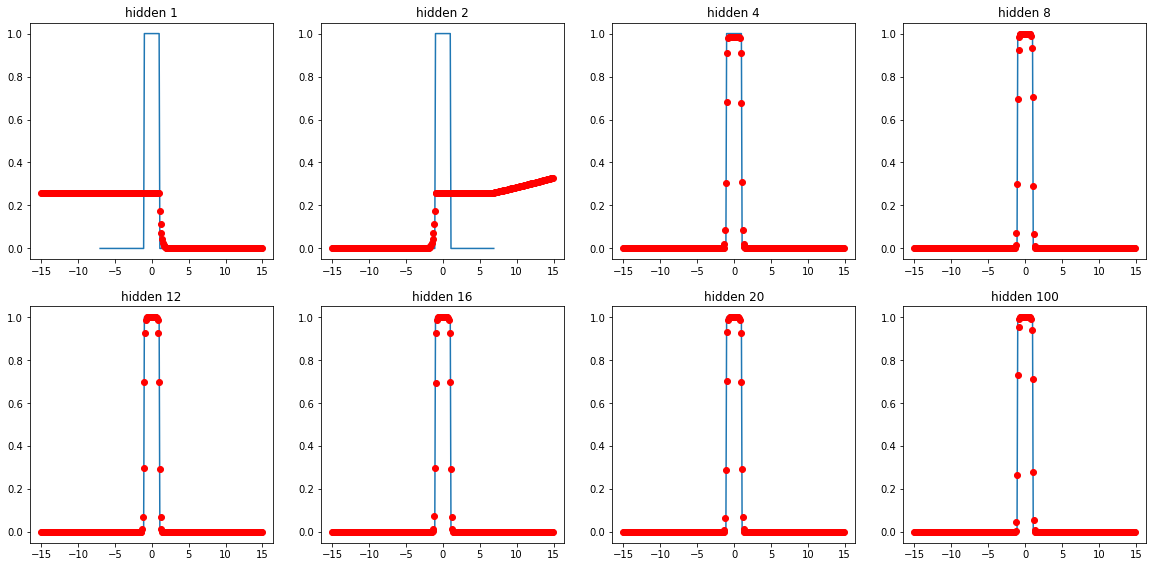

             activations: ['tanh', 'sigmoid']


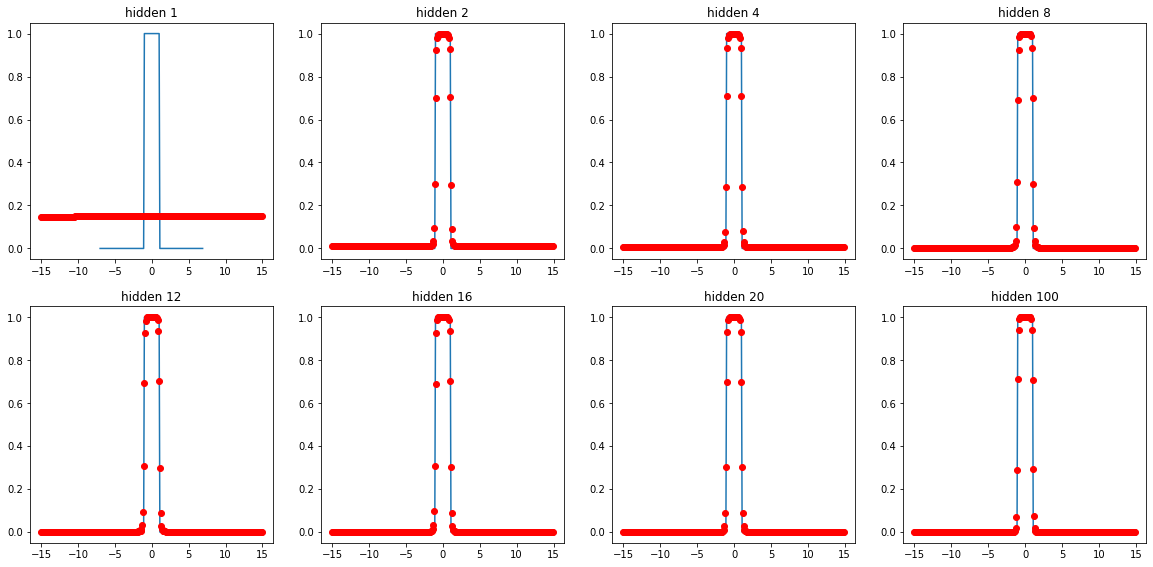

             activations: ['', 'tanh']


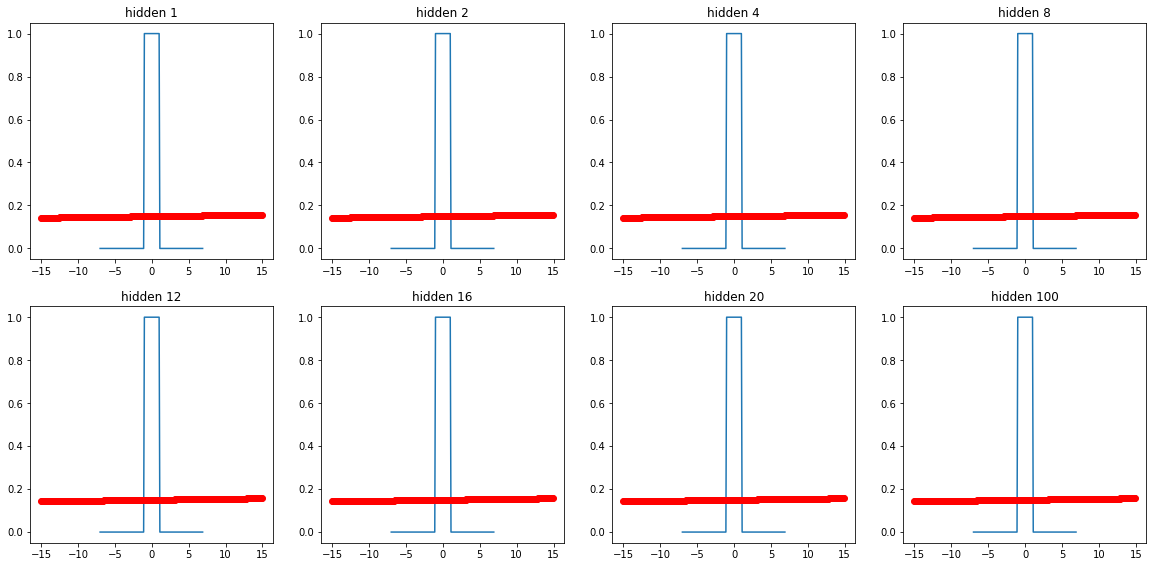

             activations: ['relu', 'tanh']


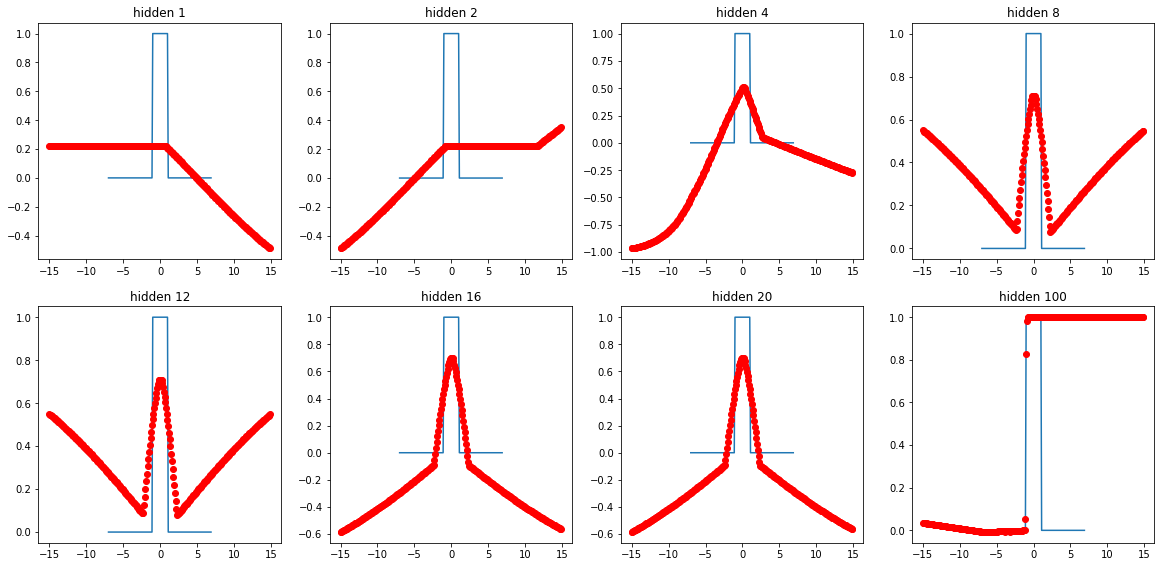

             activations: ['', '']


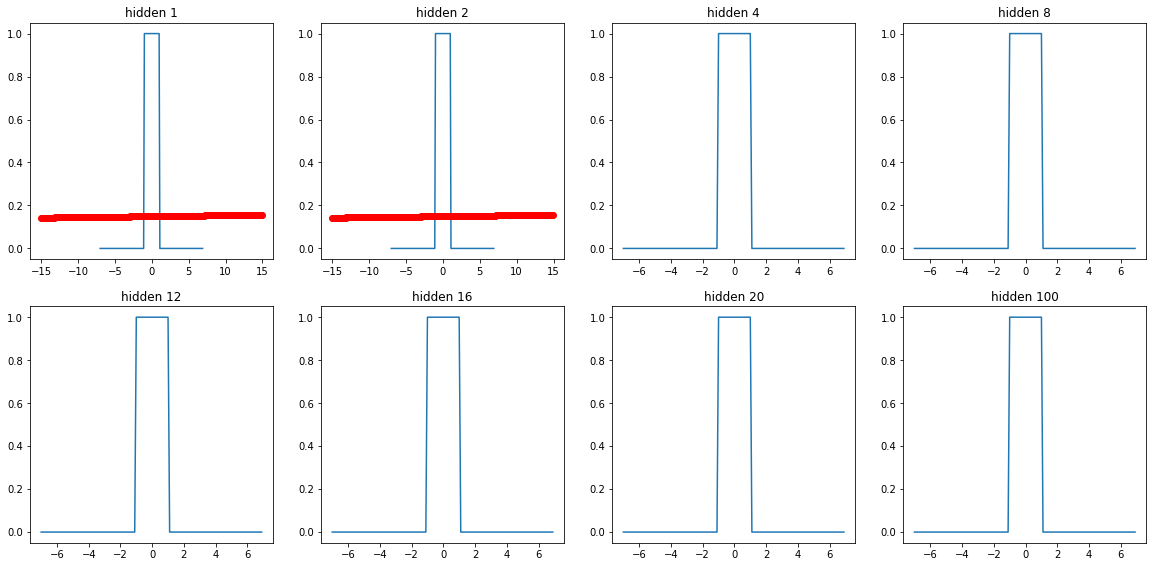

             activations: ['relu', '']


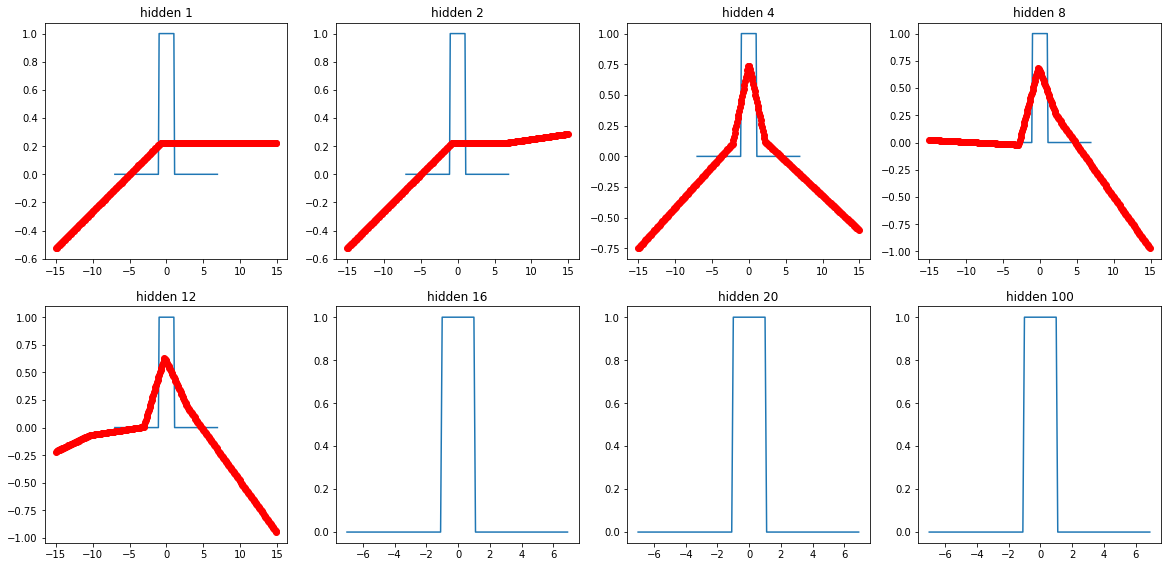

             activations: ['', 'relu']


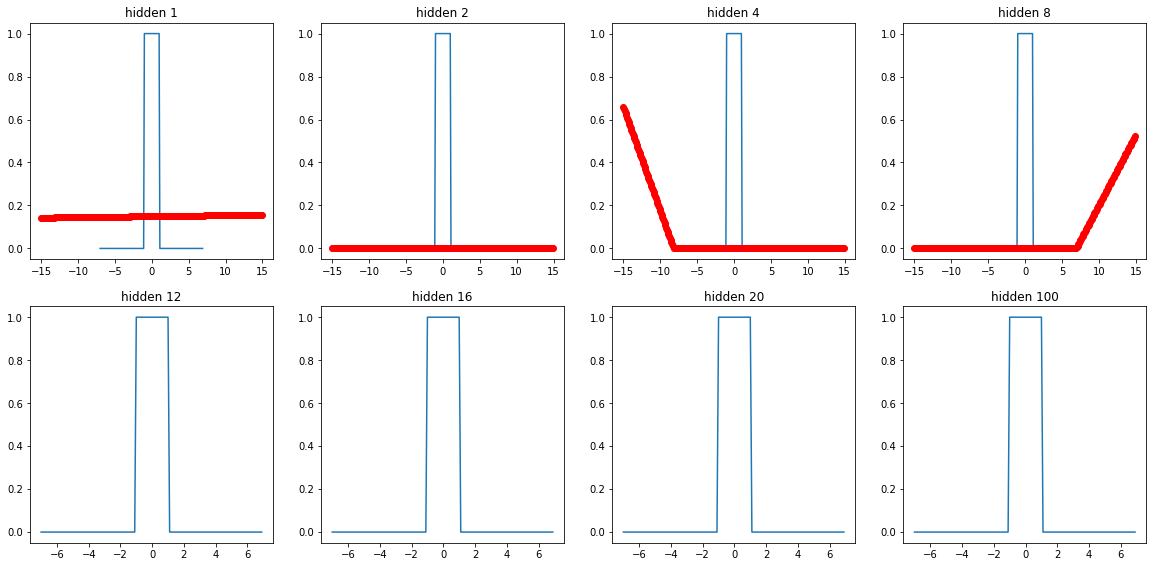

             activations: ['tanh', '']


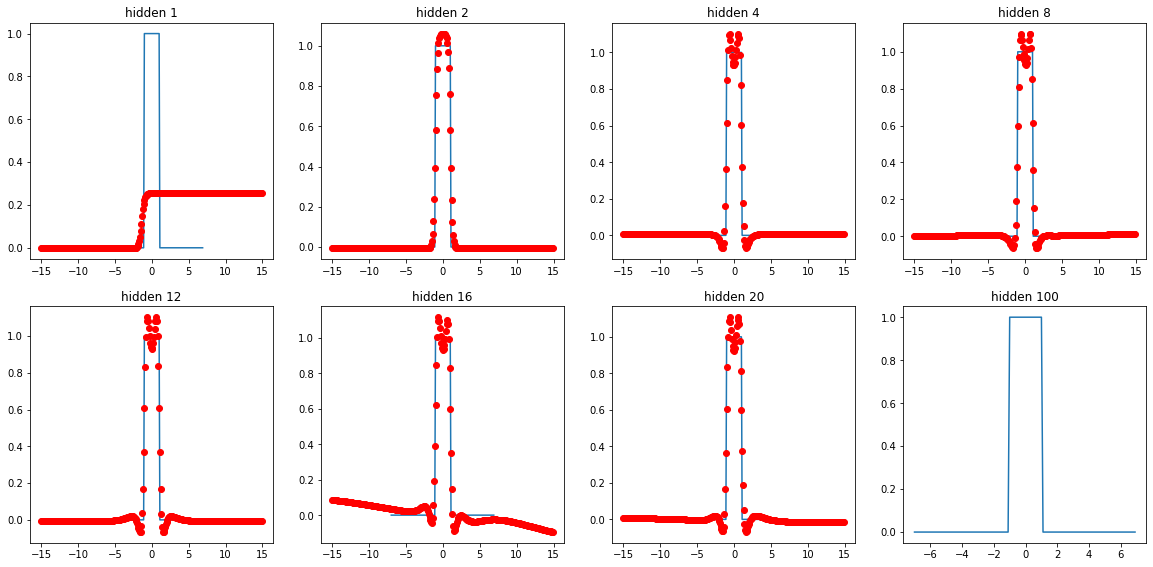

             activations: ['sigmoid', '']


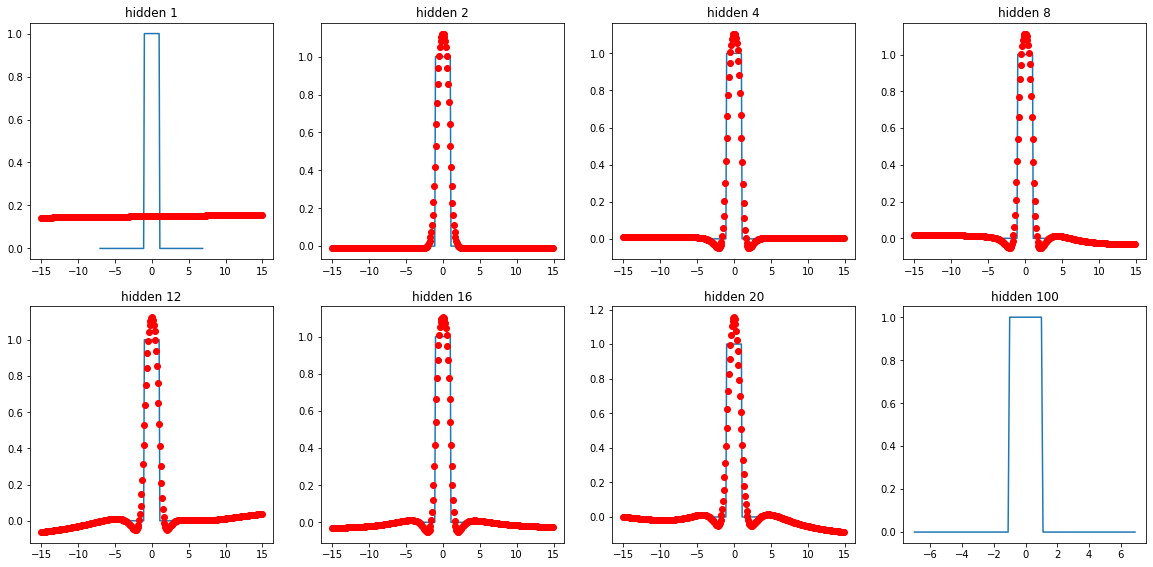

             activations: ['sigmoid', 'relu']


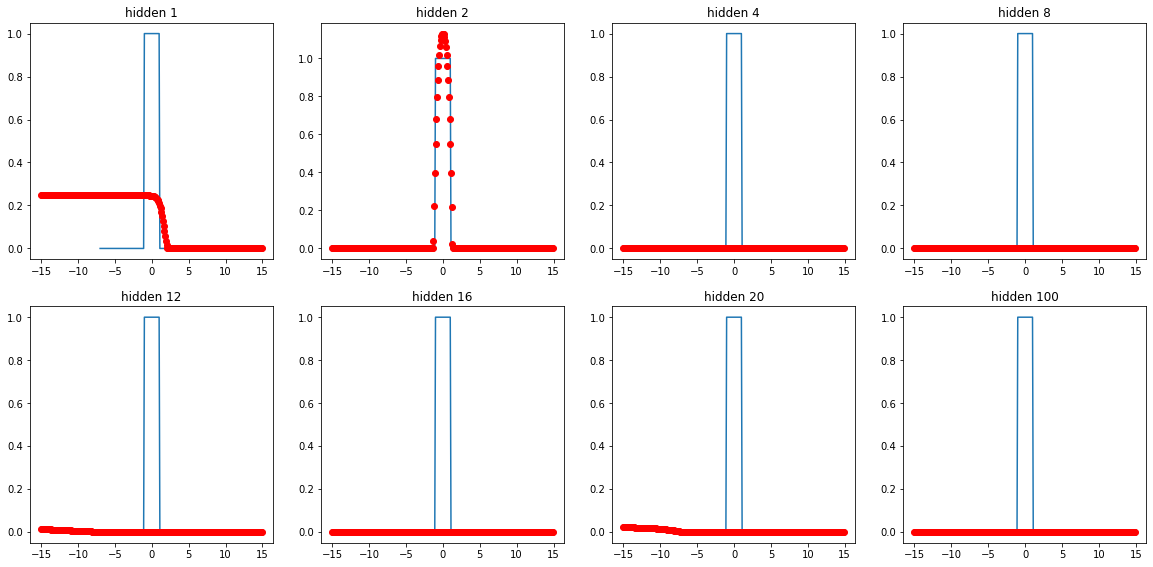

             activations: ['relu', 'sigmoid']


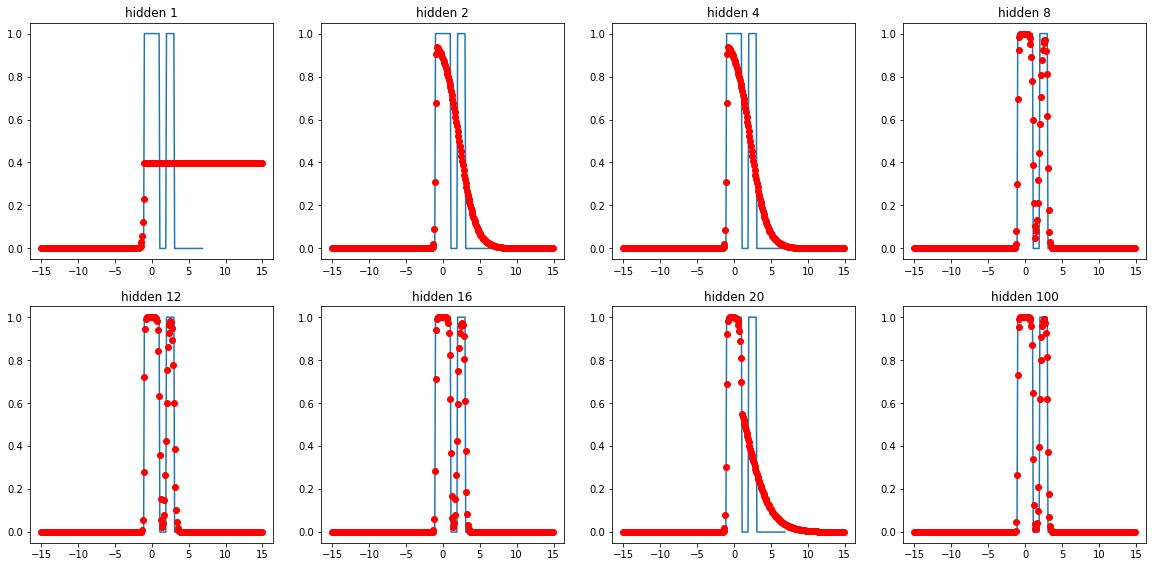

             activations: ['tanh', 'sigmoid']


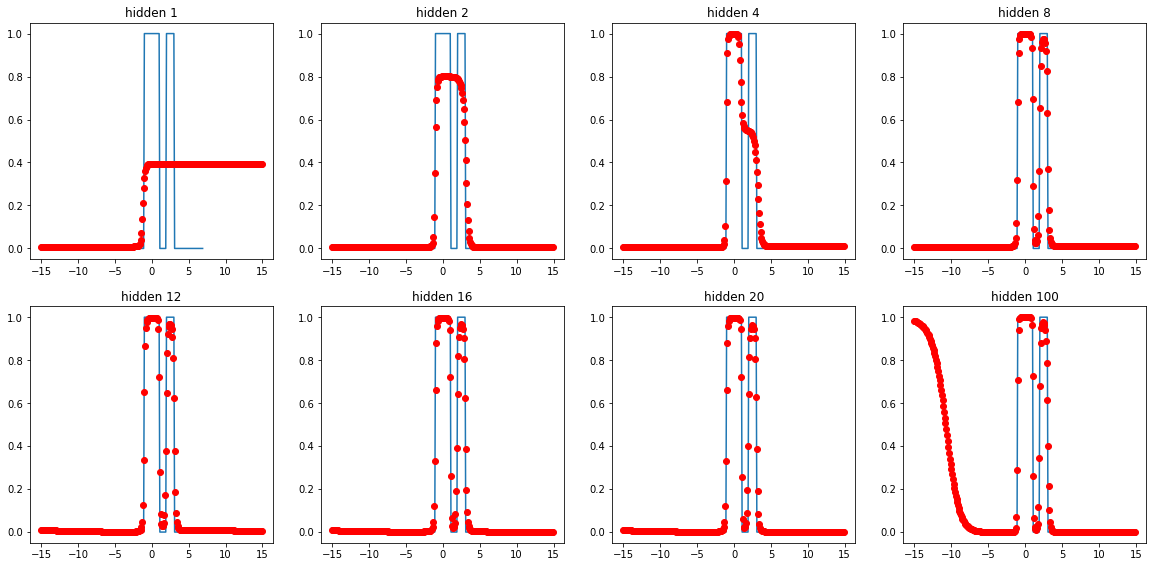

             activations: ['', 'tanh']


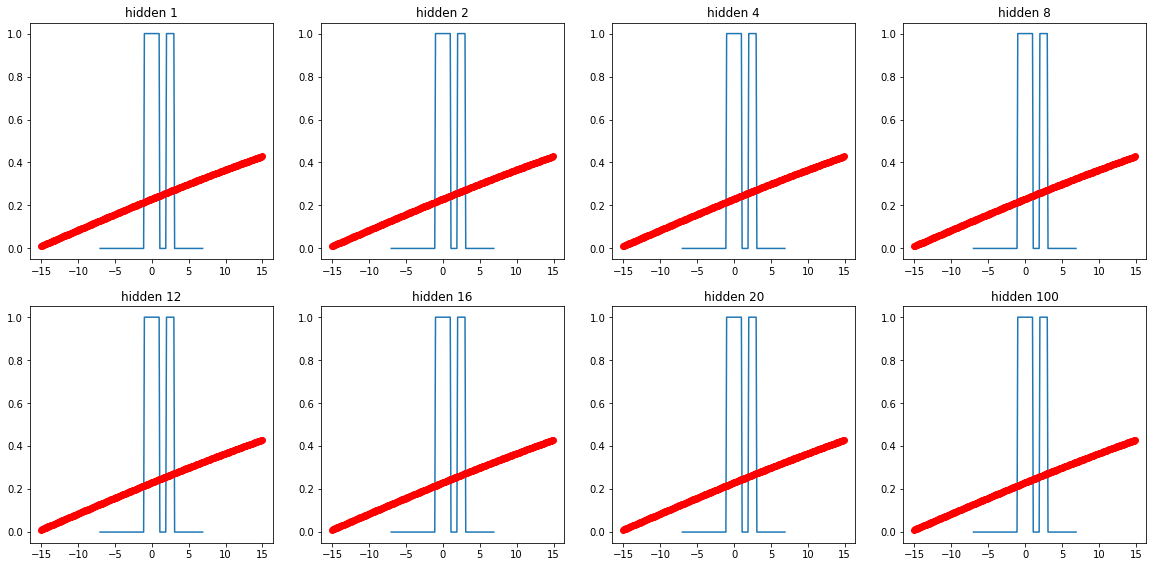

             activations: ['relu', 'tanh']


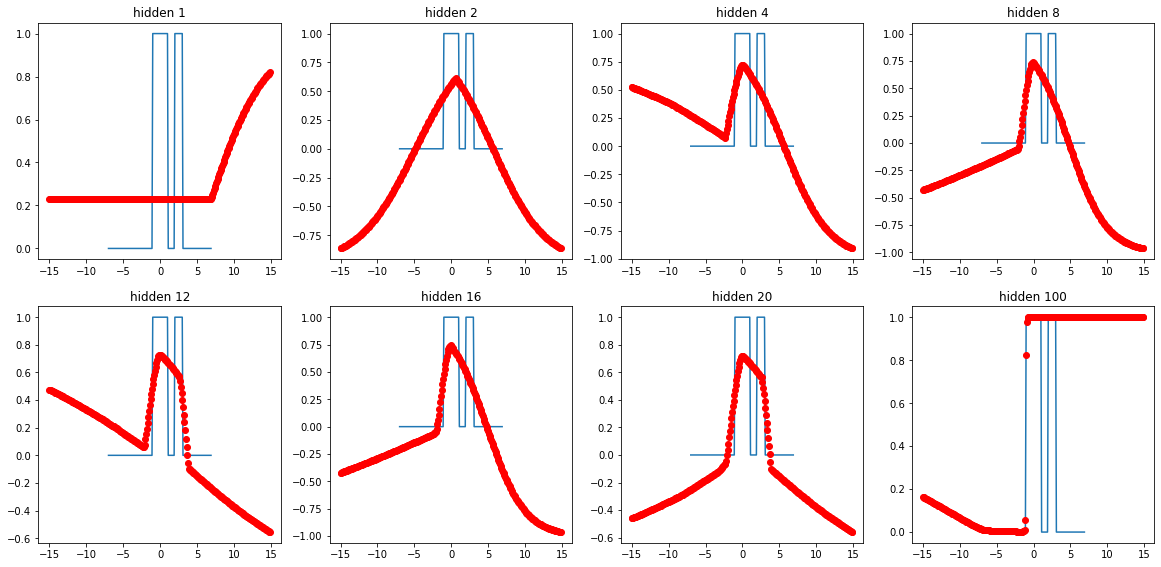

             activations: ['', '']


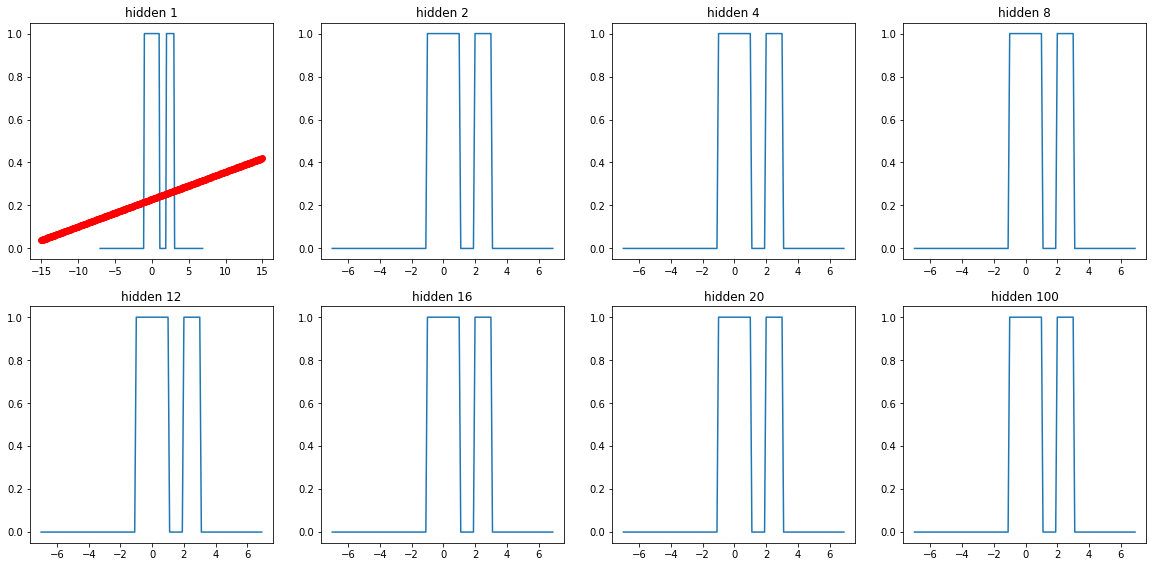

             activations: ['relu', '']


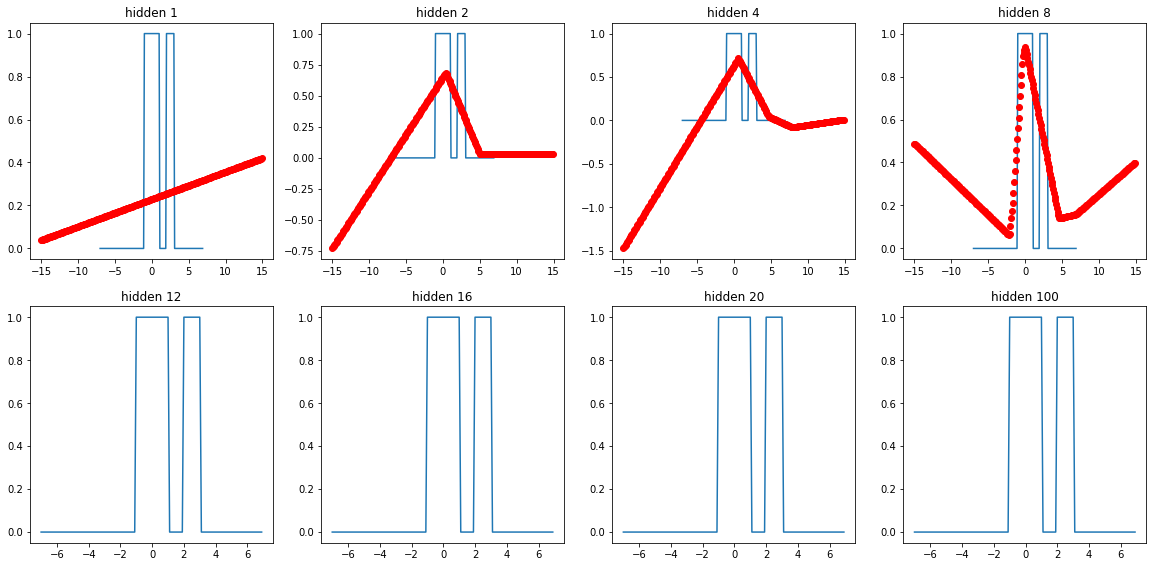

             activations: ['', 'relu']


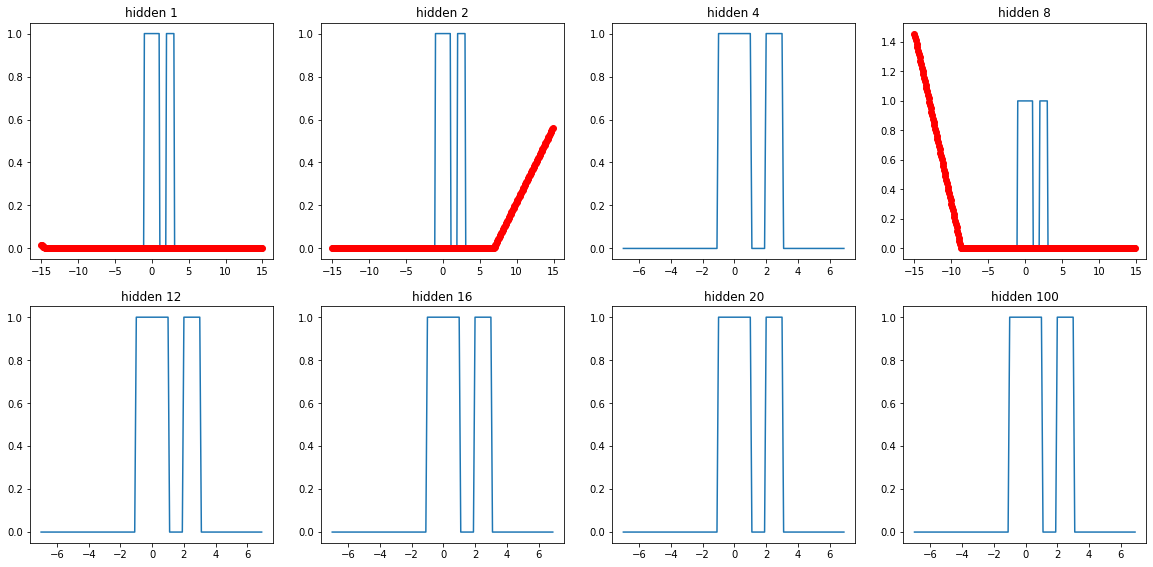

             activations: ['tanh', '']


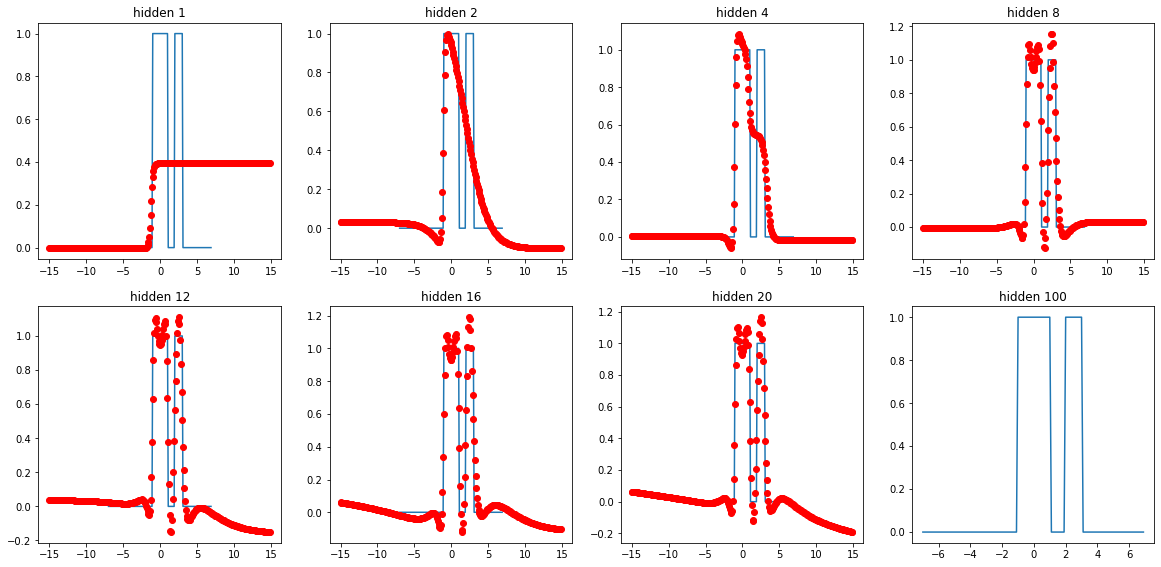

             activations: ['sigmoid', '']


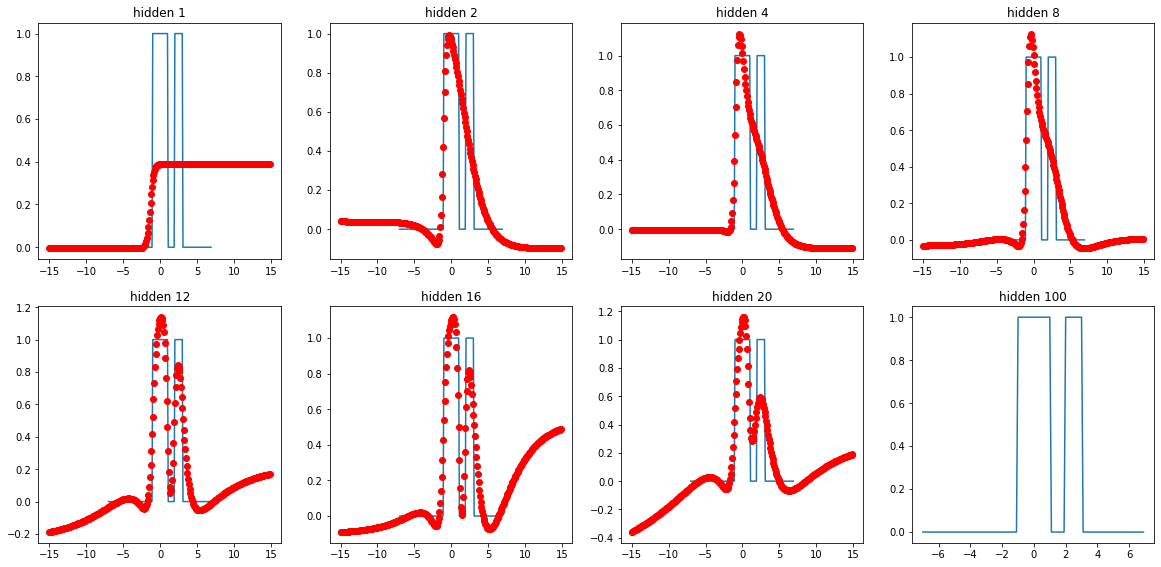

             activations: ['sigmoid', 'relu']


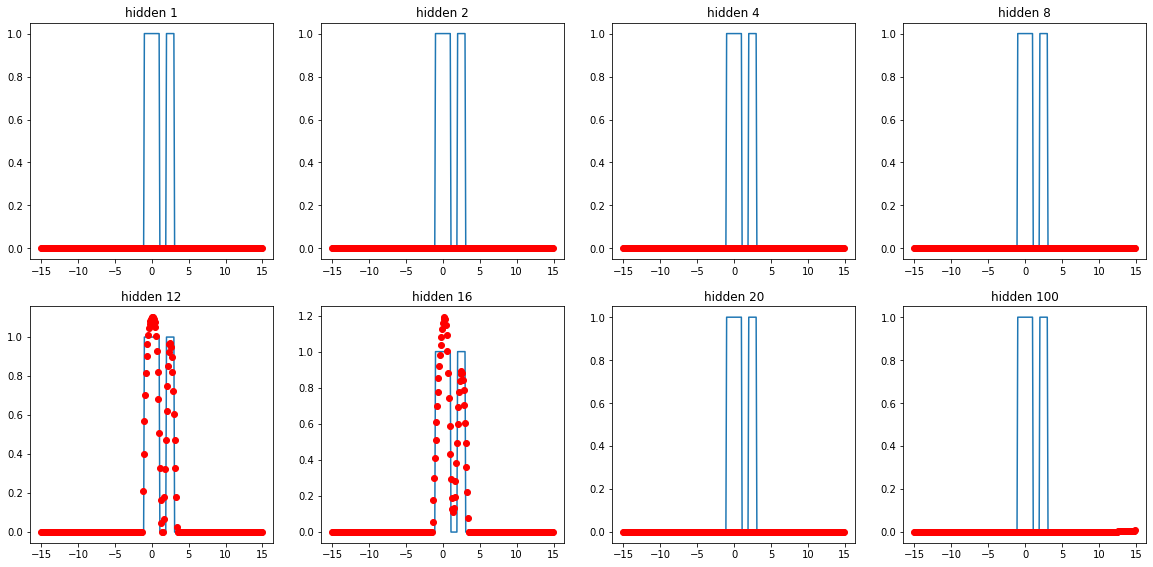

In [13]:
for f in [f_poly1, f_poly2, f_sin1, f_sin2, f_log1, f_step1, f_step2]:
    for act in [
        ['relu', 'sigmoid'],
        ['tanh', 'sigmoid'],
        ['', 'tanh'],
        ['relu', 'tanh'],
        ['', ''],
        ['relu', ''],
        ['', 'relu'],
        ['tanh', ''],
        ['sigmoid', ''],
        ['sigmoid', 'relu'],
    ]:
        
        print('========================================================')
        print('             activations:', act)
        print('========================================================')
        # Show some images
        fig = plt.figure(figsize=(20,20))
        colsize = 4
        rowsize = 4
        plot_id = 1
        for hid in [1, 2, 4, 8, 12, 16, 20, 100]:
            # Input data
            # We train it from -7 to 7
            X = torch.arange(-7,7,0.1).view(-1,1)
            y = f(X)
            
            # Create model
            model = get_model(num_hidden = hid, activations = act)
            optimizer = optim.SGD(model.parameters(), lr = 0.1)
            
            # Train model
            train(model)
            
            # Add subplot
            fig.add_subplot(colsize, rowsize, plot_id)
            plot_id += 1
            
            # Plot the predictions (out of range values)
            # We test it for -15 to 15 (includes test data as well)
            X_test = torch.arange(-15,15,0.1).view(-1,1)
            pred = model(X_test)
            plt.title('hidden ' + str(hid))
            plt.plot(X.numpy(), y.numpy())
            plt.plot(X_test.numpy(), pred.data.numpy(), 'ro')
            
        plt.show()